# Análisis de la Encuesta Multiproposito

## Importación de Paquetes y carga del archivo

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

In [2]:
data = pd.read_excel('Encuesta_Multiproposito_Suba.xlsx')

In [3]:
data.head(2)

,COD_LOCALIDAD,NOMBRE_LOCALIDAD,COD_UPZ_GRUPO,NOMBRE_UPZ_GRUPO,ESTRATO2021,NOMBRE_ESTRATO,NVCBP1,NVCBP2,NVCBP3,NVCBP4,...,NHCLP29_1L,NHCLP31AA,NHCLP31AB,NHCLP31AC,NHCLP31BA,NHCLP31BB,NHCLP31BC,NHCLP31CA,NHCLP31CB,NHCLP31CC
0,11,Suba,28.0,El Rincón,11001122,El Rincon,Sendero o camino en tierra,NaN,Si,Si,...,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0
1,11,Suba,28.0,El Rincón,11001122,El Rincon,Sendero o camino en tierra,NaN,Si,Si,...,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0


In [4]:
data.shape

(24536, 498)

**Hay en total 24536 encuestados en la Localidad de Suba**

# Segunda Sección (NHCCP)

## NHCCP1
### 1. La vivienda ocupada por este hogar es:

1. Propia, totalmente pagada
2. Propia, la están pagando
3. En arriendo, subarriendo
4. Leasing
5. En usufructo
6. Otra forma de tenencia 

**Datos: 24536**

In [5]:
data['NHCCP1'].count()

24536

In [6]:
data['NHCCP1'].value_counts()

1    10544
3     9522
2     2946
6      715
5      537
4      272
Name: NHCCP1, dtype: int64

In [7]:
data['NHCCP1'] = data['NHCCP1'].replace([1,2,3,4,5,6],["Propia, totalmente paga",
                                                      "Propia, la están pagando",
                                                      "En arriendo, subarriendo",
                                                      "Leasing",
                                                      "En usufructo",
                                                      "Otra forma de tenencia"])

In [8]:
data['NHCCP1'].value_counts()

Propia, totalmente paga     10544
En arriendo, subarriendo     9522
Propia, la están pagando     2946
Otra forma de tenencia        715
En usufructo                  537
Leasing                       272
Name: NHCCP1, dtype: int64

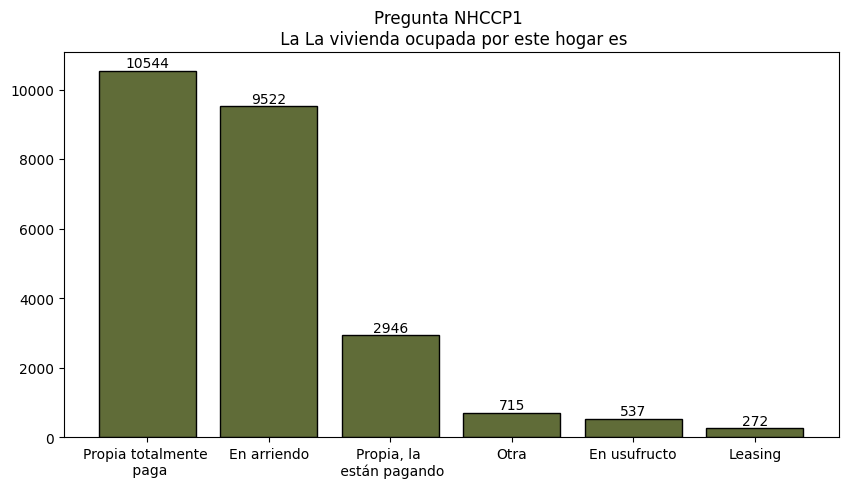

In [9]:
plt.figure(figsize=(10,5))
bars = plt.bar(data['NHCCP1'].value_counts().index.tolist(),data['NHCCP1'].value_counts().tolist(), edgecolor = 'black', color = '#606c38')
plt.xticks(["Propia, totalmente paga","Propia, la están pagando",
            "En arriendo, subarriendo","Leasing","En usufructo",
            "Otra forma de tenencia"],
           ['Propia totalmente \n paga', 'Propia, la \n están pagando', 'En arriendo','Leasing','En usufructo','Otra'])
plt.title('Pregunta NHCCP1 \n La La vivienda ocupada por este hogar es')
plt.bar_label(bars)
plt.show()

## NHCCP2
### 2. ¿Cuál es el valor MENSUAL de la cuota?

**Datos: 2946**

In [10]:
data['NHCCP2'].count()

2946

In [11]:
data['NHCCP2'].describe()

count    2.946000e+03
mean     1.621601e+06
std      1.485061e+06
min      9.900000e+01
25%      6.300000e+05
50%      1.300000e+06
75%      2.200000e+06
max      1.390000e+07
Name: NHCCP2, dtype: float64

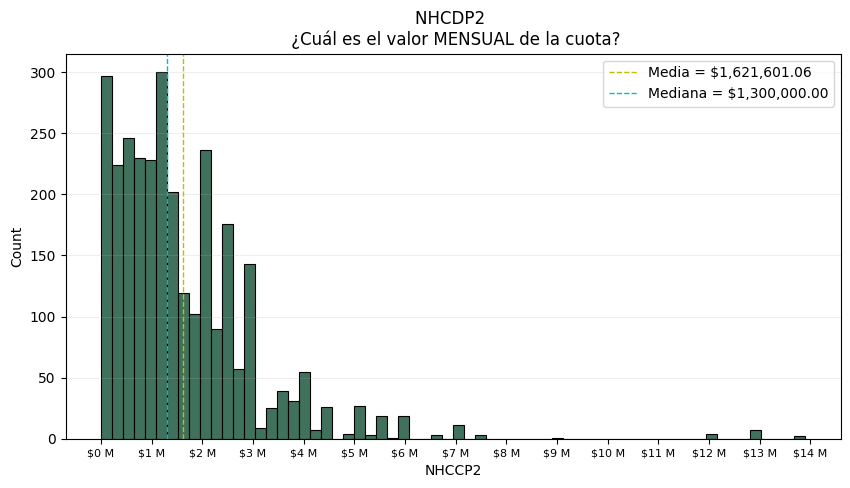

In [12]:
plt.figure(figsize=(10,5))
sns.histplot(data = data, x = 'NHCCP2', color = '#004225', fill = True)
plt.title('NHCDP2 \n ¿Cuál es el valor MENSUAL de la cuota?')
plt.grid(alpha = 0.2, axis = 'y')
plt.axvline(data['NHCCP2'].mean(), color='y', linestyle='dashed', linewidth=1, label = f'Media = ${data["NHCCP2"].mean():,.2f}')
plt.axvline(data['NHCCP2'].median(), color='c', linestyle='dashed', linewidth=1, label = f'Mediana = ${data["NHCCP2"].median():,.2f}')
plt.xticks(range(0,15000000,1000000),[f'${(i / 1000000):.0f} M' for i in range(0,15000000,1000000)], fontsize=8)
plt.legend()
plt.show()

## NHCCP5
### 5. Si fuera a comprar esta vivienda ahora, ¿cuánto cree que tendría que pagar?

**Datos: 13490**

In [13]:
data['NHCCP5'].count()

13490

In [14]:
data['NHCCP5'].describe()

count    1.349000e+04
mean     2.932864e+08
std      3.044376e+08
min      9.900000e+01
25%      3.500000e+07
50%      2.400000e+08
75%      4.000000e+08
max      2.000000e+09
Name: NHCCP5, dtype: float64

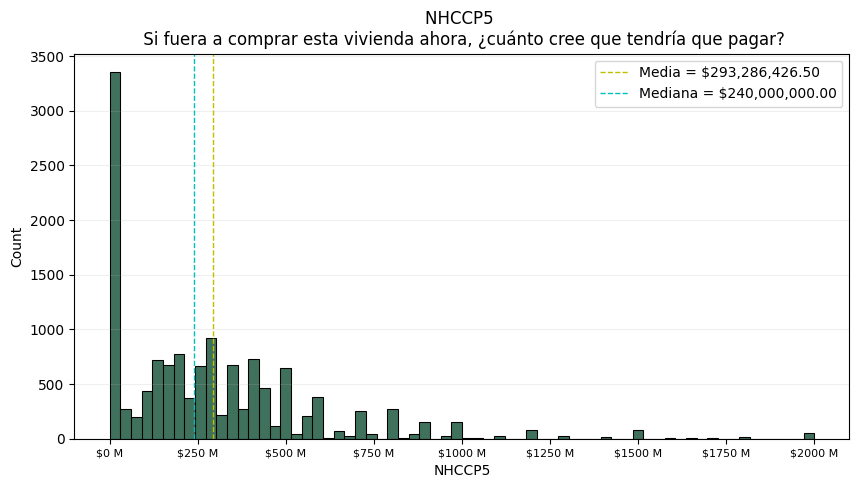

In [15]:
plt.figure(figsize=(10,5))
sns.histplot(data = data, x = 'NHCCP5', color = '#004225', fill = True)
plt.title('NHCCP5 \n Si fuera a comprar esta vivienda ahora, ¿cuánto cree que tendría que pagar?')
plt.grid(alpha = 0.2, axis = 'y')
plt.axvline(data['NHCCP5'].mean(), color='y', linestyle='dashed', linewidth=1, label = f'Media = ${data["NHCCP5"].mean():,.2f}')
plt.axvline(data['NHCCP5'].median(), color='c', linestyle='dashed', linewidth=1, label = f'Mediana = ${data["NHCCP5"].median():,.2f}')
plt.xticks(range(0,2200000000,250000000),[f'${(i / 1000000):.0f} M' for i in range(0,2200000000,250000000)], fontsize=8)
plt.legend()
plt.show()

## NHCCP7
### 7. ¿Cuál fue el valor de la compra?

**Datos: 2865**

In [16]:
data['NHCCP7'].count()

2865

In [17]:
data['NHCCP7'].describe().apply("{0:.2f}".format)

count          2865.00
mean      280128262.04
std       268255342.41
min              99.00
25%        70000000.00
50%       250000000.00
75%       390000000.00
max      2000000000.00
Name: NHCCP7, dtype: object

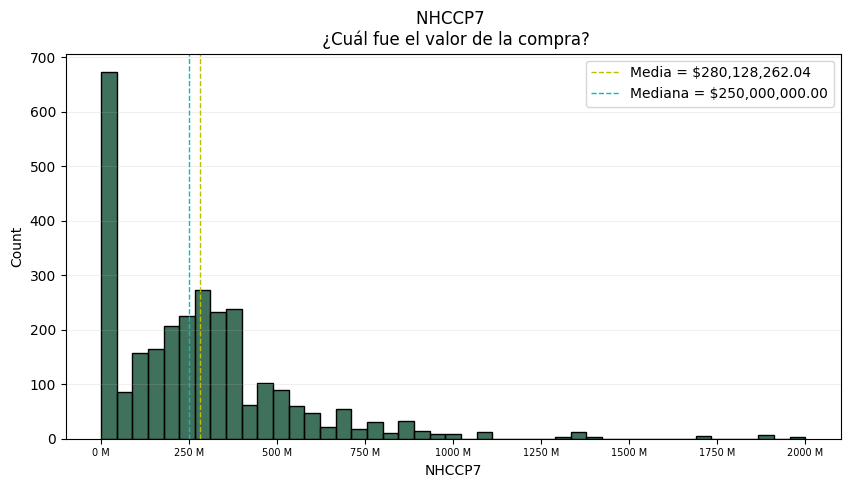

In [18]:
plt.figure(figsize=(10,5))
sns.histplot(data = data, x = 'NHCCP7', color = '#004225', fill = True)
plt.title('NHCCP7 \n ¿Cuál fue el valor de la compra?')
plt.grid(alpha = 0.2, axis = 'y')
plt.axvline(data['NHCCP7'].mean(), color='y', linestyle='dashed', linewidth=1, label = f'Media = ${data["NHCCP7"].mean():,.2f}')
plt.axvline(data['NHCCP7'].median(), color='c', linestyle='dashed', linewidth=1, label = f'Mediana = ${data["NHCCP7"].median():,.2f}')
plt.xticks(range(0,2200000000,250000000),[f'{(i / 1000000):.0f} M' for i in range(0,2200000000,250000000)], fontsize=7)
plt.legend()
plt.show()

## NHCCP8_
### 8. ¿Cuáles de las siguientes fuentes de financiamiento utilizaron para la compra o construcción de esta vivienda (incluida la compra del lote)?

**Datos: 2865**

In [19]:
finaciamiento = [i for i in data.columns if 'NHCCP8' in str(i)]

In [20]:
for i in finaciamiento:
    print(i, data[i].count())

NHCCP8_1 2865
NHCCP8_2 2865
NHCCP8_3 2865
NHCCP8_4 2865
NHCCP8_5 2865
NHCCP8_6 2865
NHCCP8_7 2865
NHCCP8_8 2865
NHCCP8_9 2865
NHCCP8_10 2865


In [21]:
for i in finaciamiento:
    print(data[i].value_counts())

1.0    1739
0.0    1126
Name: NHCCP8_1, dtype: int64
0.0    2548
1.0     317
Name: NHCCP8_2, dtype: int64
0.0    2692
1.0     173
Name: NHCCP8_3, dtype: int64
0.0    2717
1.0     148
Name: NHCCP8_4, dtype: int64
0.0    2782
1.0      83
Name: NHCCP8_5, dtype: int64
0.0    2613
1.0     252
Name: NHCCP8_6, dtype: int64
0.0    2202
1.0     663
Name: NHCCP8_7, dtype: int64
1.0    1820
0.0    1045
Name: NHCCP8_8, dtype: int64
0.0    2759
1.0     106
Name: NHCCP8_9, dtype: int64
0.0    2807
1.0      58
Name: NHCCP8_10, dtype: int64


In [22]:
for i in finaciamiento:
    data = data.replace({i:2},0) 

In [23]:
for i in finaciamiento:
    data[i] = data[i].replace([0,1],["No","Si"]) 

In [24]:
l_finan = ['Crédito bancario\n hipotecario',
           'Crédito bancario\n diferente al hipotecario',
           'Crédito con el FNA',
           'Crédito con cooperativas \n o fondos de empleados',
           'Crédito con fondos de vivienda \n o cajas de vivienda',
           'Prestamos de amigos o familiares',
           'Cesantias',
           'Recursos Propios o ahorros',
           'Subsidios',
           'Otra']

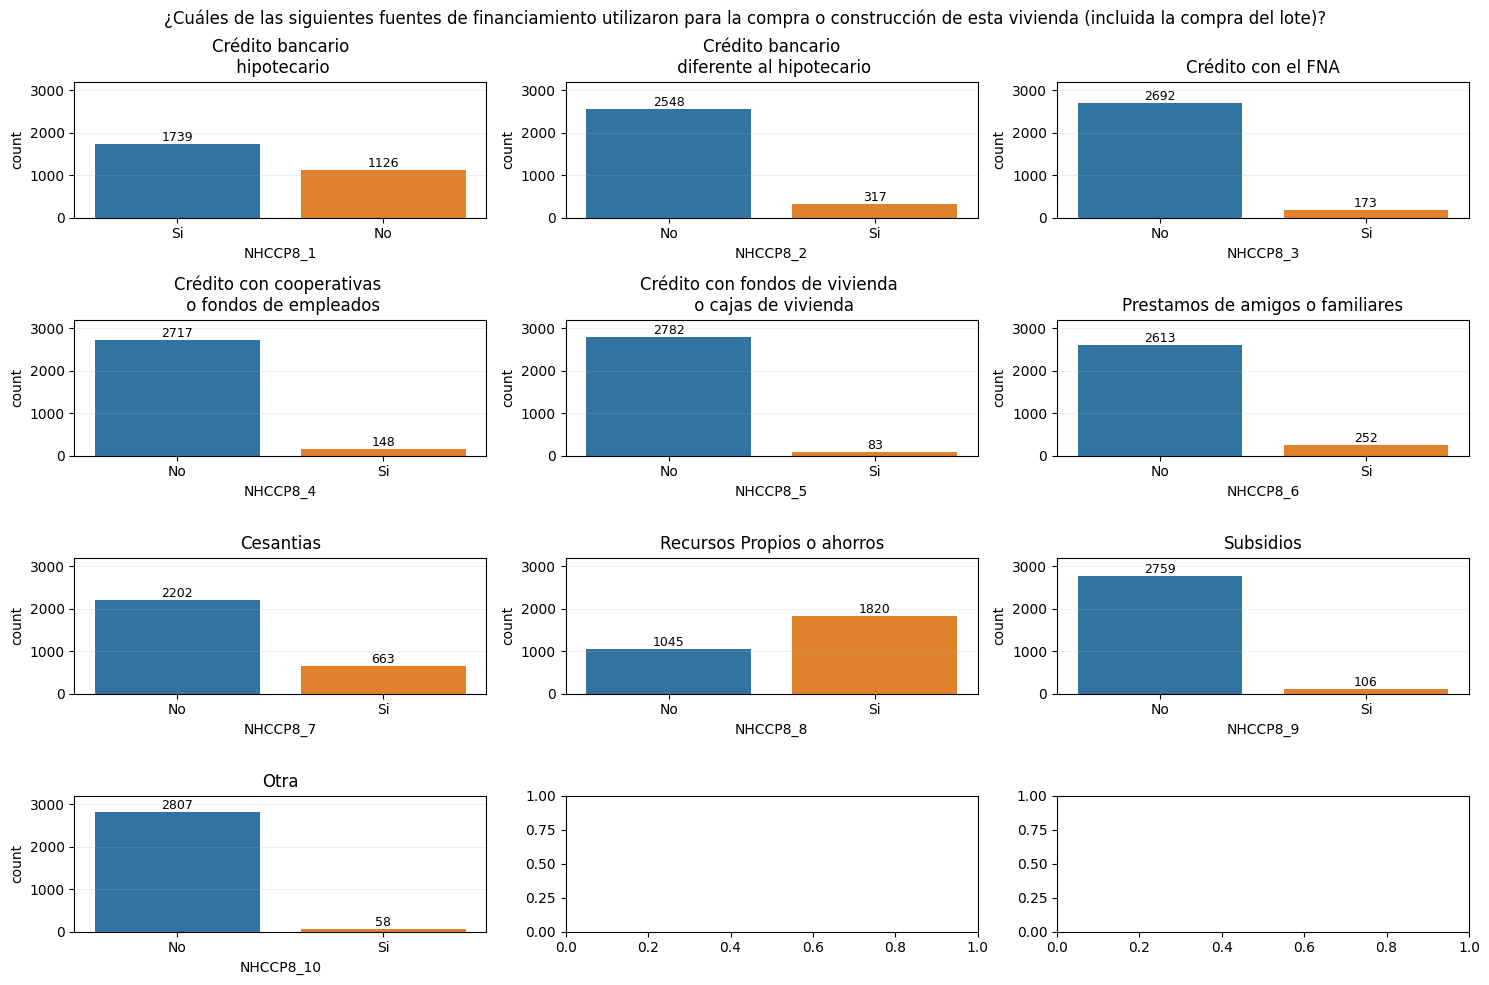

In [25]:
fig, axes = plt.subplots(4,3, figsize = (15,10), squeeze=False)
axli = axes.flatten()
fig.subplots_adjust(top=0.9)
fig.suptitle('¿Cuáles de las siguientes fuentes de financiamiento utilizaron para la compra o construcción de esta vivienda (incluida la compra del lote)?')
for ax,cols,names in zip(axli,finaciamiento,l_finan):
    sns.countplot(x = cols, data = data, ax = ax)
    ax.grid(alpha = 0.2, axis = 'y')
    ax.set_title(f'{names}')
    #ax.set_xticks([0,1],['No','Si'])
    ax.set_ylim(0,3200)
    ax.margins(y=0.1) # make room for the labels
    for bars in ax.containers:
        ax.bar_label(bars, fmt='%.0f', fontsize=9)
plt.tight_layout() 
    
plt.show()

## NHCCP10
### 10. ¿Cuánto paga MENSUALMENTE por el arriendo o leasing de esta vivienda?
 
**Datos: 9794**

In [26]:
data['NHCCP10'].describe().apply("{0:.2f}".format)

count        9794.00
mean      1222062.98
std       1291967.78
min            99.00
25%        600000.00
50%        950000.00
75%       1500000.00
max      25000000.00
Name: NHCCP10, dtype: object

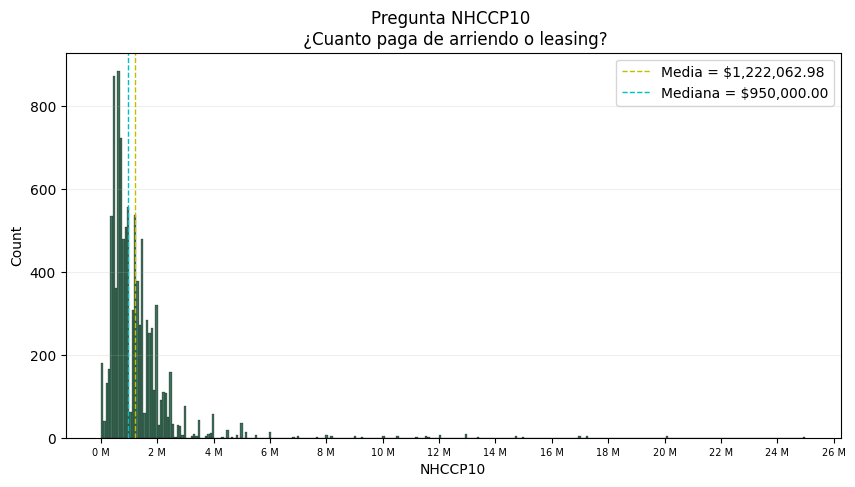

In [27]:
plt.figure(figsize=(10,5))
sns.histplot(data = data, x = 'NHCCP10', color = '#004225', fill = True)
plt.title('Pregunta NHCCP10 \n ¿Cuanto paga de arriendo o leasing?')
plt.grid(alpha = 0.2, axis = 'y')
plt.axvline(data['NHCCP10'].mean(), color='y', linestyle='dashed', linewidth=1, label = f'Media = ${data["NHCCP10"].mean():,.2f}')
plt.axvline(data['NHCCP10'].median(), color='c', linestyle='dashed', linewidth=1, label = f'Mediana = ${data["NHCCP10"].median():,.2f}')
plt.xticks(range(0,27000000,2000000),[f'{(i / 1000000):.0f} M' for i in range(0,27000000,2000000)], fontsize=7)
plt.legend()
plt.show()


## NHCCP10A
### 10a .¿Cuenta con contrato escrito de arrendamiento?

0. No
1. Si

**Datos: 9522**

In [28]:
data['NHCCP10A'].value_counts()

1.0    7042
0.0    2480
Name: NHCCP10A, dtype: int64

In [29]:
data = data.replace({'NHCCP10A':2},0)

In [30]:
data['NHCCP10A'] = data['NHCCP10A'].replace([0,1],["No","Si"])

In [31]:
data['NHCCP10A'].value_counts()

Si    7042
No    2480
Name: NHCCP10A, dtype: int64

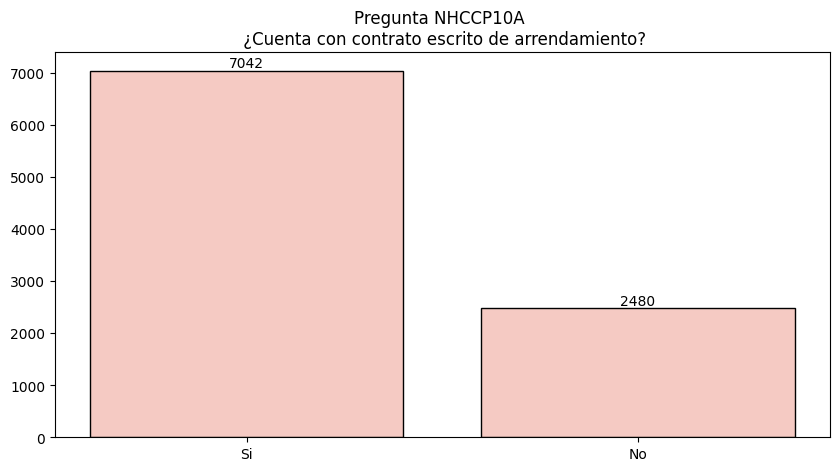

In [32]:
plt.figure(figsize=(10,5))
bars = plt.bar(data['NHCCP10A'].value_counts().index.tolist(),data['NHCCP10A'].value_counts().tolist(), edgecolor = 'black', color = '#f5cac3')
#plt.xticks([0,1], ['No','Si'])
plt.title('Pregunta NHCCP10A \n ¿Cuenta con contrato escrito de arrendamiento?')
plt.bar_label(bars)
plt.show()

## NHCCP10B
### 10b. ¿A raíz de las medidas tomadas por la pandemia del coronavirus (Covid-19), entre marzo de 2020 y el momento actual se atrasó o dejo de pagar alguna cuota de arrendamiento?

0. No
1. Si

**Datos: 9522**


In [33]:
data['NHCCP10B'].count()

9522

In [34]:
data['NHCCP10B'].value_counts()

0.0    6618
1.0    2904
Name: NHCCP10B, dtype: int64

In [35]:
data = data.replace({'NHCCP10B':2},0) 

In [36]:
data['NHCCP10B'] = data['NHCCP10B'].replace([0,1],["No","Si"])

In [37]:
data['NHCCP10B'].value_counts()

No    6618
Si    2904
Name: NHCCP10B, dtype: int64

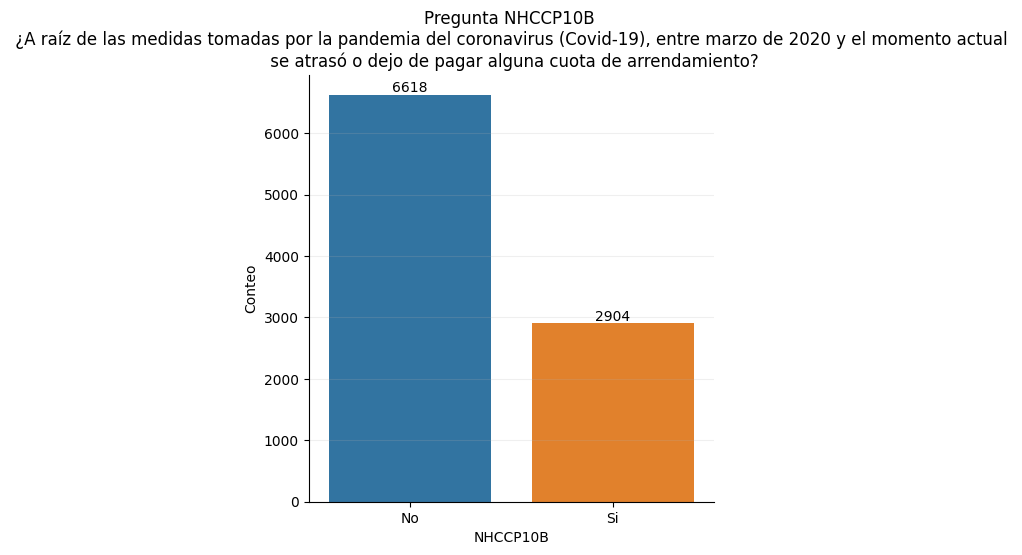

In [38]:
g = sns.catplot(data = data, x ='NHCCP10B', kind='count')
plt.title('Pregunta NHCCP10B \n ¿A raíz de las medidas tomadas por la pandemia del coronavirus (Covid-19), entre marzo de 2020 y el momento actual \n se atrasó o dejo de pagar alguna cuota de arrendamiento?')
plt.ylabel('Conteo')
plt.grid(alpha = 0.2, axis = 'y')
#plt.xticks([0,1], ['No','Si'])
ax = g.axes[0, 0]
ax.bar_label(ax.containers[0])
plt.show()

## NHCCP13
### 13. ¿Cuáles de las siguientes fuentes de financiamiento piensan utilizar para la compra de esta vivienda?

0. No
1. Si

**Datos: 5609**

In [39]:
financiamiento = [i for i in data.columns if 'NHCCP13' in str(i)]

In [40]:
for i in financiamiento:
    print(i, data[i].count())

NHCCP13A 5609
NHCCP13B 5609
NHCCP13C 5609
NHCCP13D 5609
NHCCP13E 5609
NHCCP13F 5609
NHCCP13G 5609
NHCCP13H 5609
NHCCP13I 5609
NHCCP13J 5609


In [41]:
for i in financiamiento:
    data[i] = data[i].replace([0,1],["No","Si"]) 

In [42]:
financiamiento

['NHCCP13A',
 'NHCCP13B',
 'NHCCP13C',
 'NHCCP13D',
 'NHCCP13E',
 'NHCCP13F',
 'NHCCP13G',
 'NHCCP13H',
 'NHCCP13I',
 'NHCCP13J']

In [43]:
for i in financiamiento:
    data = data.replace({i:2},0) 

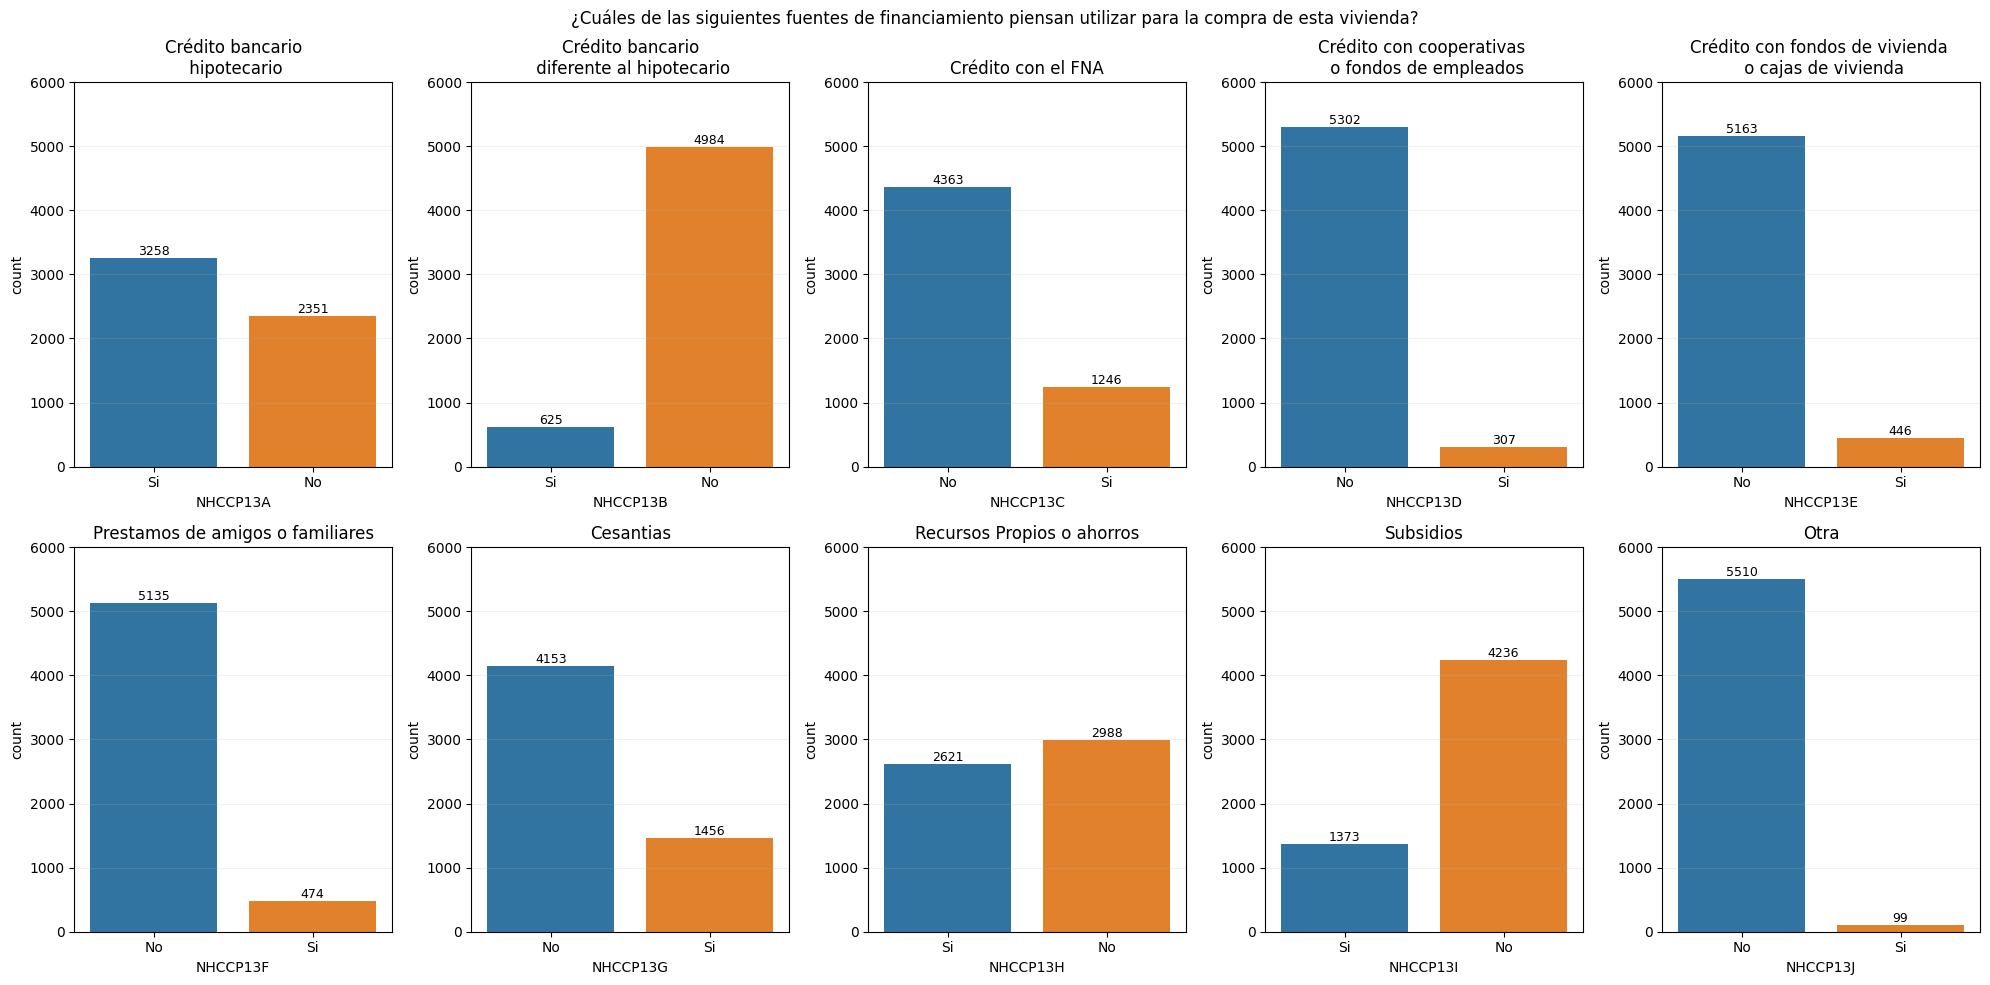

In [44]:
fig, axes = plt.subplots(2,5, figsize = (20,10), squeeze=False)
axli = axes.flatten()
fig.subplots_adjust(top=0.9)
fig.suptitle('¿Cuáles de las siguientes fuentes de financiamiento piensan utilizar para la compra de esta vivienda?')
for ax,cols,names in zip(axli,financiamiento,l_finan):
    sns.countplot(x = cols, data = data, ax = ax)
    ax.grid(alpha = 0.2, axis = 'y')
    ax.set_title(f'{names}')
    #ax.set_xticks([0,1],['No','Si'])
    ax.set_ylim(0,6000)
    ax.margins(y=0.1) # make room for the labels
    for bars in ax.containers:
        ax.bar_label(bars, fmt='%.0f', fontsize=9)
plt.tight_layout()
    
plt.show()

## NHCCPCTRL2
### 16. ¿Cuántas personas componen este hogar?

**Datos: 24536**

In [45]:
data['NHCCPCTRL2'].count()

24536

In [46]:
data['NHCCPCTRL2'].describe().apply("{0:.2f}".format)

count    24536.00
mean         3.29
std          1.36
min          1.00
25%          2.00
50%          3.00
75%          4.00
max         10.00
Name: NHCCPCTRL2, dtype: object

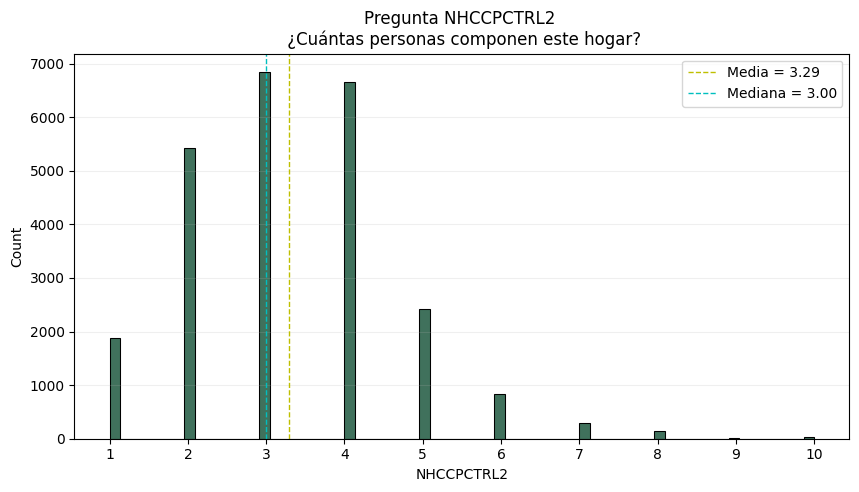

In [47]:
plt.figure(figsize=(10,5))
sns.histplot(data = data, x = 'NHCCPCTRL2', color = '#004225', fill = True)
plt.title('Pregunta NHCCPCTRL2 \n ¿Cuántas personas componen este hogar?')
plt.grid(alpha = 0.2, axis = 'y')
plt.axvline(data['NHCCPCTRL2'].mean(), color='y', linestyle='dashed', linewidth=1, label = f'Media = {data["NHCCPCTRL2"].mean():.2f}')
plt.axvline(data['NHCCPCTRL2'].median(), color='c', linestyle='dashed', linewidth=1, label = f'Mediana = {data["NHCCPCTRL2"].median():.2f}')
plt.xticks(range(1,11))
plt.legend()
plt.show()


## NHCCP20
### 18. ¿En cuántos de esos cuartos duermen las personas del hogar?

**Datos: 24536**

*Revisar Caso 99*

In [35]:
data['NHCCP20'].value_counts()

2     9060
3     8716
1     5141
4     1394
5      175
6       33
99      10
7        7
Name: NHCCP20, dtype: int64

In [100]:
data['NHCCP20'].describe().apply("{0:.2f}".format)

count    24536.00
mean         2.33
std          2.15
min          1.00
25%          2.00
50%          2.00
75%          3.00
max         99.00
Name: NHCCP20, dtype: object

In [102]:
data['NHCCP20'] = data['NHCCP20'].replace(99,stats.trim_mean(data['NHCCP20'],0.1))

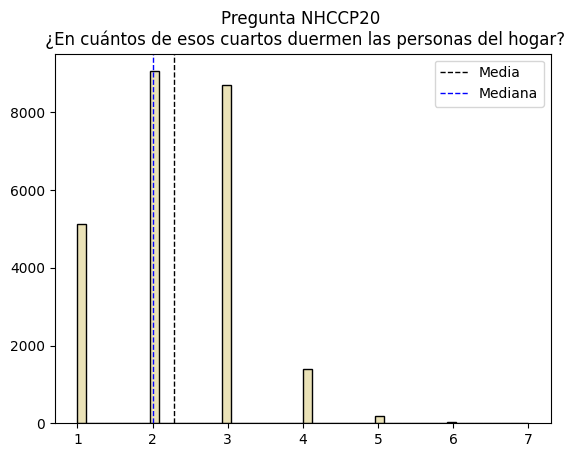

In [103]:
counts, edges, bars = plt.hist(data['NHCCP20'], bins = 50, edgecolor = 'black', color = '#eae2b7')
#ticklabels = [i for i in range(5)]
#plt.xticks(range(5), ticklabels)
#plt.xticks(range(11))
#plt.bar_label(bars)
plt.title('Pregunta NHCCP20 \n ¿En cuántos de esos cuartos duermen las personas del hogar?')
#plt.xlim([-1,10])
plt.axvline(data['NHCCP20'].mean(), color='k', linestyle='dashed', linewidth=1, label = 'Media')
plt.axvline(data['NHCCP20'].median(), color='b', linestyle='dashed', linewidth=1, label = 'Mediana')
plt.legend()
plt.show()

## NHCCP26A
### 24. ¿Cuánto pagaron EL MES PASADO en combustible para cocinar?

**Datos: 887**

In [104]:
data['NHCCP26A'].describe().apply("{0:.2f}".format)

count       887.00
mean      79376.07
std       59649.47
min           0.00
25%       68000.00
50%       74000.00
75%       80000.00
max      680000.00
Name: NHCCP26A, dtype: object

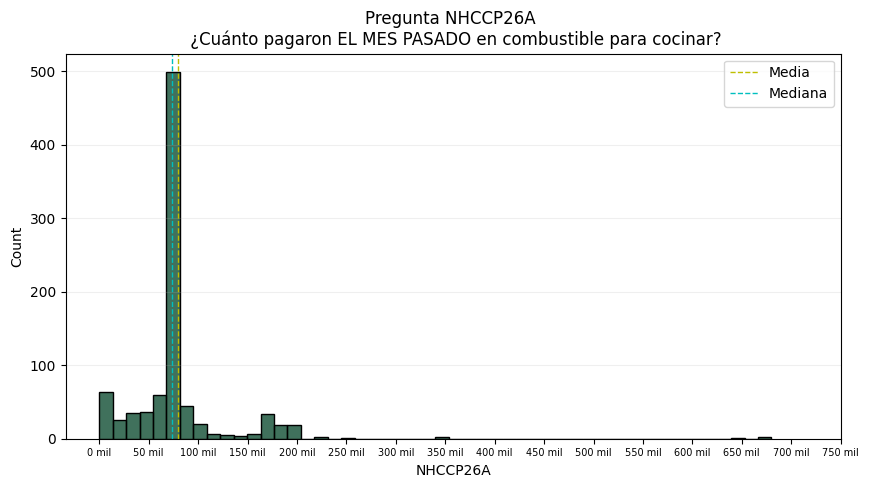

In [107]:
plt.figure(figsize=(10,5))
sns.histplot(data = data, x = 'NHCCP26A', bins = 50, edgecolor = 'black', color = '#004225')
plt.title('Pregunta NHCCP26A \n ¿Cuánto pagaron EL MES PASADO en combustible para cocinar?')
plt.grid(alpha = 0.2, axis = 'y')
plt.axvline(data['NHCCP26A'].mean(), color='y', linestyle='dashed', linewidth=1, label = 'Media')
plt.axvline(data['NHCCP26A'].median(), color='c', linestyle='dashed', linewidth=1, label = 'Mediana')
plt.xticks(range(0,800000,50000),[f'{(i / 1000):.0f} mil' for i in range(0,800000,50000)], fontsize=7)
plt.legend()
plt.show()

## NHCCP27
### 25. El agua para preparar los alimentos (o beber) la obtienen principalmente de:
1. Acueducto público
2. Acueducto comunal o veredal
3. Pozo con bomba
4. Pozo sin bomba, aljibe, jagüey o barreno
5. Agua lluvia
6. Río, quebrada, manantial o nacimiento
7. Pila pública
8. Aguatero
9. Carrotanque
10. Agua embotellada o en bolsa

**Datos: 24536**

In [36]:
data['NHCCP27'].value_counts()

1     23872
2       342
3       142
10       79
4        33
9        29
6        19
8        12
5         5
7         3
Name: NHCCP27, dtype: int64

In [37]:
data['NHCCP27'] = data['NHCCP27'].replace([1,2,3,4,5,6,7,8,9,10],['Acueducto público',
                                   'Acueducto  comunal o veredal',
                                   'Pozo con  bomba',
                                   'Pozo sin bomba, aljibe, jagüey  o barreno',
                                   'Agua lluvia',
                                   'Río, quebrada, manantial o  nacimiento',
                                   'Pila pública',
                                   'Aguatero',
                                   'Carrotanque',
                                   'Agua embotellada o en  bolsa'])

In [38]:
data['NHCCP27'].value_counts()

Acueducto público                            23872
Acueducto  comunal o veredal                   342
Pozo con  bomba                                142
Agua embotellada o en  bolsa                    79
Pozo sin bomba, aljibe, jagüey  o barreno       33
Carrotanque                                     29
Río, quebrada, manantial o  nacimiento          19
Aguatero                                        12
Agua lluvia                                      5
Pila pública                                     3
Name: NHCCP27, dtype: int64

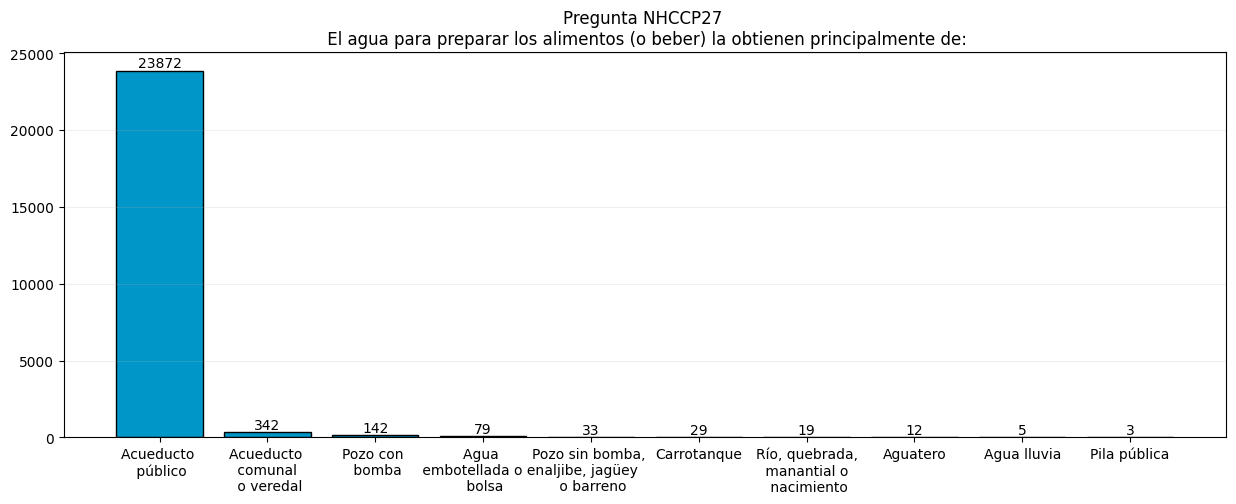

In [40]:
plt.figure(figsize=(15,5))
bars = plt.bar(data['NHCCP27'].value_counts().index.tolist(),data['NHCCP27'].value_counts().tolist(), edgecolor = 'black', color = '#0096c7')
plt.title('Pregunta NHCCP27 \n El agua para preparar los alimentos (o beber) la obtienen principalmente de:')
plt.xticks(['Acueducto público',
                                   'Acueducto  comunal o veredal',
                                   'Pozo con  bomba',
                                   'Pozo sin bomba, aljibe, jagüey  o barreno',
                                   'Agua lluvia',
                                   'Río, quebrada, manantial o  nacimiento',
                                   'Pila pública',
                                   'Aguatero',
                                   'Carrotanque',
                                   'Agua embotellada o en  bolsa'],['Acueducto \n público',
                                   'Acueducto \n comunal \n o veredal',
                                   'Pozo con \n bomba',
                                   'Pozo sin bomba, \n aljibe, jagüey \n o barreno',
                                   'Agua lluvia',
                                   'Río, quebrada,\n manantial o \n nacimiento',
                                   'Pila pública',
                                   'Aguatero',
                                   'Carrotanque',
                                   'Agua \n embotellada o en \n bolsa'])
plt.bar_label(bars)
plt.grid(alpha = 0.2, axis = 'y')
plt.show()

## NHCCP28
### 26. ¿El agua llega al hogar todos los 7 días de la semana?

0. No
1. Si

**Datos: 24214**

In [41]:
data['NHCCP28'].value_counts()

1.0    24035
0.0      179
Name: NHCCP28, dtype: int64

In [112]:
data = data.replace({'NHCCP28':2},0)

In [42]:
data['NHCCP28'] = data['NHCCP28'].replace([0,1],["No","Si"])

In [43]:
data['NHCCP28'].value_counts()

Si    24035
No      179
Name: NHCCP28, dtype: int64

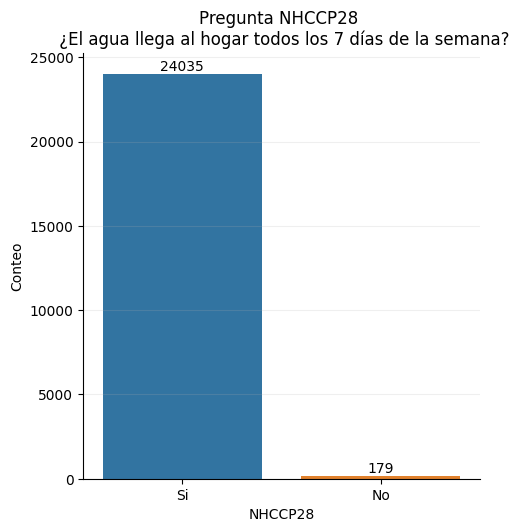

In [44]:
g = sns.catplot(data = data, x ='NHCCP28', kind='count')
plt.title('Pregunta NHCCP28 \n ¿El agua llega al hogar todos los 7 días de la semana?')
plt.ylabel('Conteo')
plt.grid(alpha = 0.2, axis = 'y')
#plt.xticks([0,1], ['No','Si'])
ax = g.axes[0, 0]
ax.bar_label(ax.containers[0])
plt.show()

## NHCCP28A
### ¿Cuántos días a la semana llega?

**Datos: 179**

In [114]:
data['NHCCP28A'].count()

179

In [115]:
data['NHCCP28A'].describe().apply("{0:.2f}".format)

count    179.00
mean       5.52
std        1.67
min        1.00
25%        5.00
50%        6.00
75%        6.00
max        8.00
Name: NHCCP28A, dtype: object

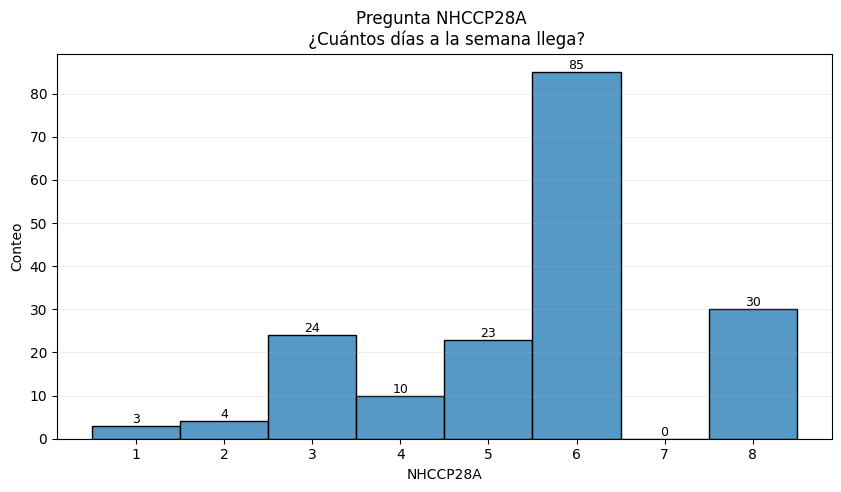

In [139]:
fig, ax = plt.subplots(figsize=(10,5))
g = sns.histplot(data = data, x ='NHCCP28A', bins = np.arange(1,10)-0.5)
ax.set_title('Pregunta NHCCP28A \n ¿Cuántos días a la semana llega?')
ax.set_ylabel('Conteo')
ax.grid(alpha = 0.2, axis = 'y')
for bars in ax.containers:
    ax.bar_label(bars, fmt='%.0f', fontsize=9)
plt.show()

## NHCCP29
### 27. ¿El suministro es continuo las 24 horas, los días que llega el agua?

**Datos: 24214**

In [48]:
data['NHCCP29'].value_counts()

1.0    24071
0.0      143
Name: NHCCP29, dtype: int64

In [143]:
data = data.replace({'NHCCP29':2},0)

In [49]:
data['NHCCP29'] = data['NHCCP29'].replace([0,1],["No","Si"])

In [50]:
data['NHCCP29'].value_counts()

Si    24071
No      143
Name: NHCCP29, dtype: int64

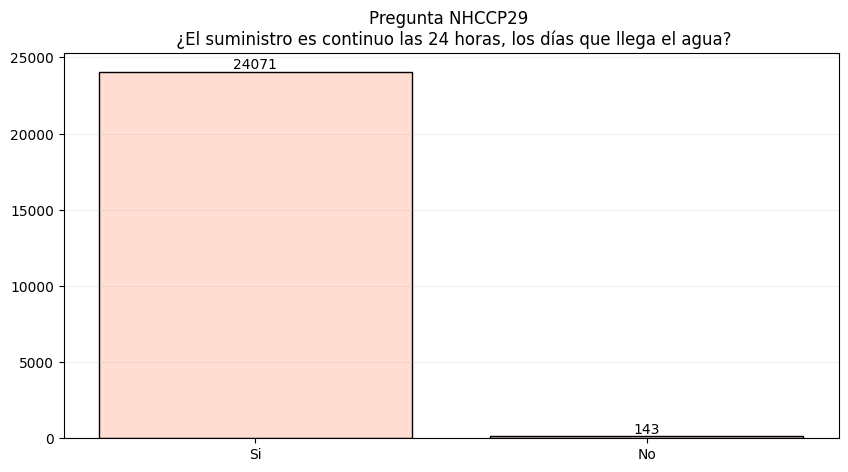

In [51]:
plt.figure(figsize=(10,5))
bars = plt.bar(data['NHCCP29'].value_counts().index.tolist(),data['NHCCP29'].value_counts().tolist(), edgecolor = 'black', color = '#ffddd2')
#plt.xticks([0,1], ['No','Si'])
plt.title('Pregunta NHCCP29 \n ¿El suministro es continuo las 24 horas, los días que llega el agua?')
plt.bar_label(bars)
plt.grid(alpha = 0.2, axis = 'y')
plt.show()

## NHCCP29A
### ¿Cuántas horas al día llega?

**Datos: 143**

In [145]:
data['NHCCP29A'].describe().apply("{0:.2f}".format)

count    143.00
mean      14.76
std        7.76
min        1.00
25%        6.00
50%       18.00
75%       22.00
max       23.00
Name: NHCCP29A, dtype: object

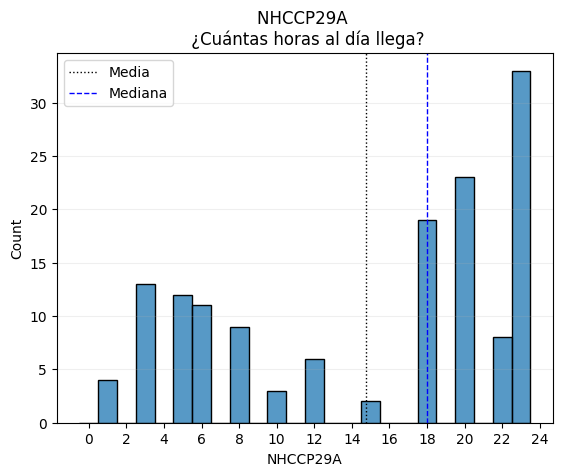

In [148]:
sns.histplot(data = data, x ='NHCCP29A', bins=np.arange(25)-0.5)
plt.title('NHCCP29A \n ¿Cuántas horas al día llega?')
plt.axvline(data['NHCCP29A'].mean(), color='k', linestyle=':', linewidth=1, label = 'Media')
plt.axvline(data['NHCCP29A'].median(), color='b', linestyle='dashed', linewidth=1, label = 'Mediana')
plt.xticks(range(0,25,2))
plt.legend()
plt.grid(alpha = 0.2, axis = 'y')
plt.show()

## NHCCP37
### 34. ¿Cómo eliminan principalmente la basura en este hogar?
1. La recogen los servicios de aseo
2. La tiran a un río, quebrada, caño o laguna
3. La tiran a un lote, patio, zanja o baldío
4. La queman
5. La entierran
6. La recoge un servicio informal (zorra, carreta, etc)

**Datos: 24536**

In [52]:
data['NHCCP37'].value_counts()

1    24355
6       80
4       51
3       43
5        5
2        2
Name: NHCCP37, dtype: int64

In [53]:
data['NHCCP37'] = data['NHCCP37'].replace([1,2,3,4,5,6],["La recogen los servicios de aseo",
                                                        "La tiran a un rio, quebrada, caño o laguna",
                                                        "La tiran a un lote, patio, zanja o baldio",
                                                        "La queman",
                                                        "La entierran",
                                                        "La recoge un servicio informal (zorra, carreta, etc)"])

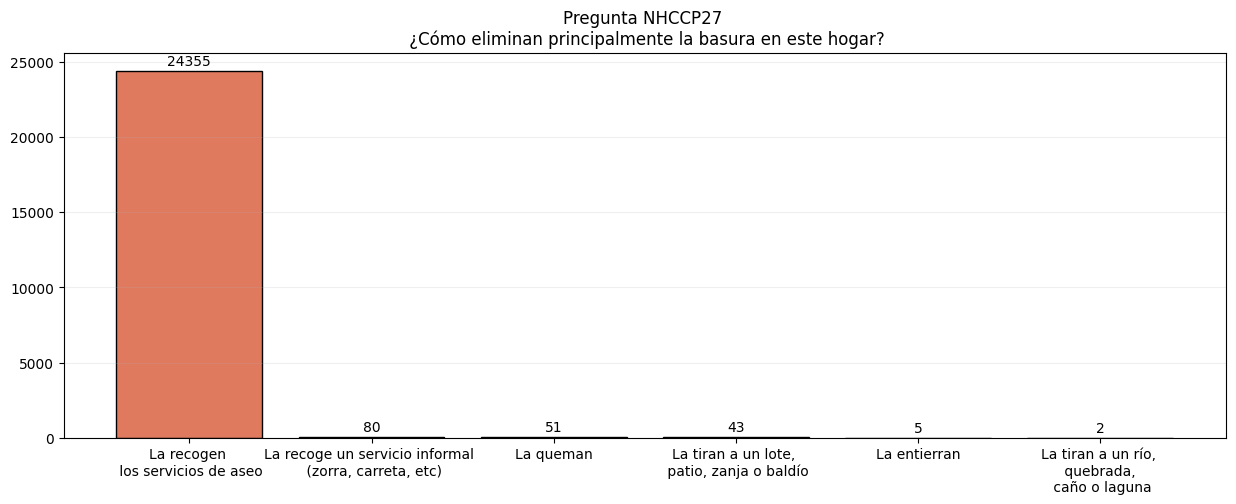

In [54]:
plt.figure(figsize=(15,5))
bars = plt.bar(data['NHCCP37'].value_counts().index.tolist(),data['NHCCP37'].value_counts().tolist(), edgecolor = 'black', color = '#e07a5f')
plt.title('Pregunta NHCCP27 \n ¿Cómo eliminan principalmente la basura en este hogar?')
plt.xticks(["La recogen los servicios de aseo",
                                                        "La tiran a un rio, quebrada, caño o laguna",
                                                        "La tiran a un lote, patio, zanja o baldio",
                                                        "La queman",
                                                        "La entierran",
                                                        "La recoge un servicio informal (zorra, carreta, etc)"],['La recogen \n los servicios de aseo',
                                   'La tiran a un río, \n quebrada, \n caño o laguna',
                                   'La tiran a un lote, \n patio, zanja o baldío',
                                   'La queman',
                                   'La entierran',
                                   'La recoge un servicio informal \n (zorra, carreta, etc)'])
plt.bar_label(bars, padding = 2)
plt.grid(alpha = 0.2, axis = 'y')
plt.show()

## NHCCP38
### 35. ¿En este hogar clasifican los residuos?

**Datos: 24536**

In [151]:
data['NHCCP38'].count()

24536

In [152]:
data['NHCCP38'].value_counts()

1    20558
2     3978
Name: NHCCP38, dtype: int64

In [153]:
data = data.replace({'NHCCP38':2},0)

In [55]:
data['NHCCP38'] = data['NHCCP38'].replace([0,1],["No","Si"])

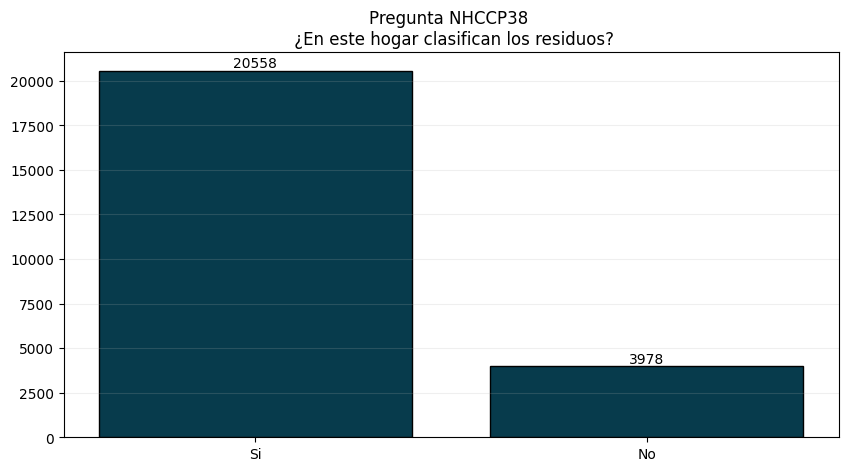

In [56]:
plt.figure(figsize=(10,5))
bars = plt.bar(data['NHCCP38'].value_counts().index.tolist(),data['NHCCP38'].value_counts().tolist(), edgecolor = 'black', color = '#073b4c')
#plt.xticks([0,1], ['No','Si'])
plt.title('Pregunta NHCCP38 \n ¿En este hogar clasifican los residuos?')
plt.bar_label(bars)
plt.grid(alpha = 0.2, axis = 'y')
plt.show()

## NHCCP38AA
### ¿Qué tipo de residuos separa?

**Datos: 20558**

In [57]:
residuos  = [i for i in data.columns if 'NHCCP38A' in str(i)]
print(residuos)
for i in residuos:
    print(i,data[i].count())

['NHCCP38AA', 'NHCCP38AB', 'NHCCP38AC', 'NHCCP38AD', 'NHCCP38AF', 'NHCCP38AG']
NHCCP38AA 20558
NHCCP38AB 20558
NHCCP38AC 20558
NHCCP38AD 20558
NHCCP38AF 20558
NHCCP38AG 20558


In [58]:
for i in residuos:
    print(data[i].value_counts())

1.0    17771
0.0     2787
Name: NHCCP38AA, dtype: int64
1.0    18598
0.0     1960
Name: NHCCP38AB, dtype: int64
1.0    19852
0.0      706
Name: NHCCP38AC, dtype: int64
1.0    19134
0.0     1424
Name: NHCCP38AD, dtype: int64
1.0    13573
0.0     6985
Name: NHCCP38AF, dtype: int64
1.0    11909
0.0     8649
Name: NHCCP38AG, dtype: int64


In [59]:
for i in residuos:
    data = data.replace({i:2},0)

In [60]:
for i in residuos:
    data[i] = data[i].replace([0,1],["No","Si"]) 

In [61]:
l_res = ['Orgánicos: vegetales y restos de comida',
         'Vidrio',
         'Papel y Cartón',
         'Empaques y envases plásticos',
         'Metales',
         'Otros (Medicamentos, pilas, etc']

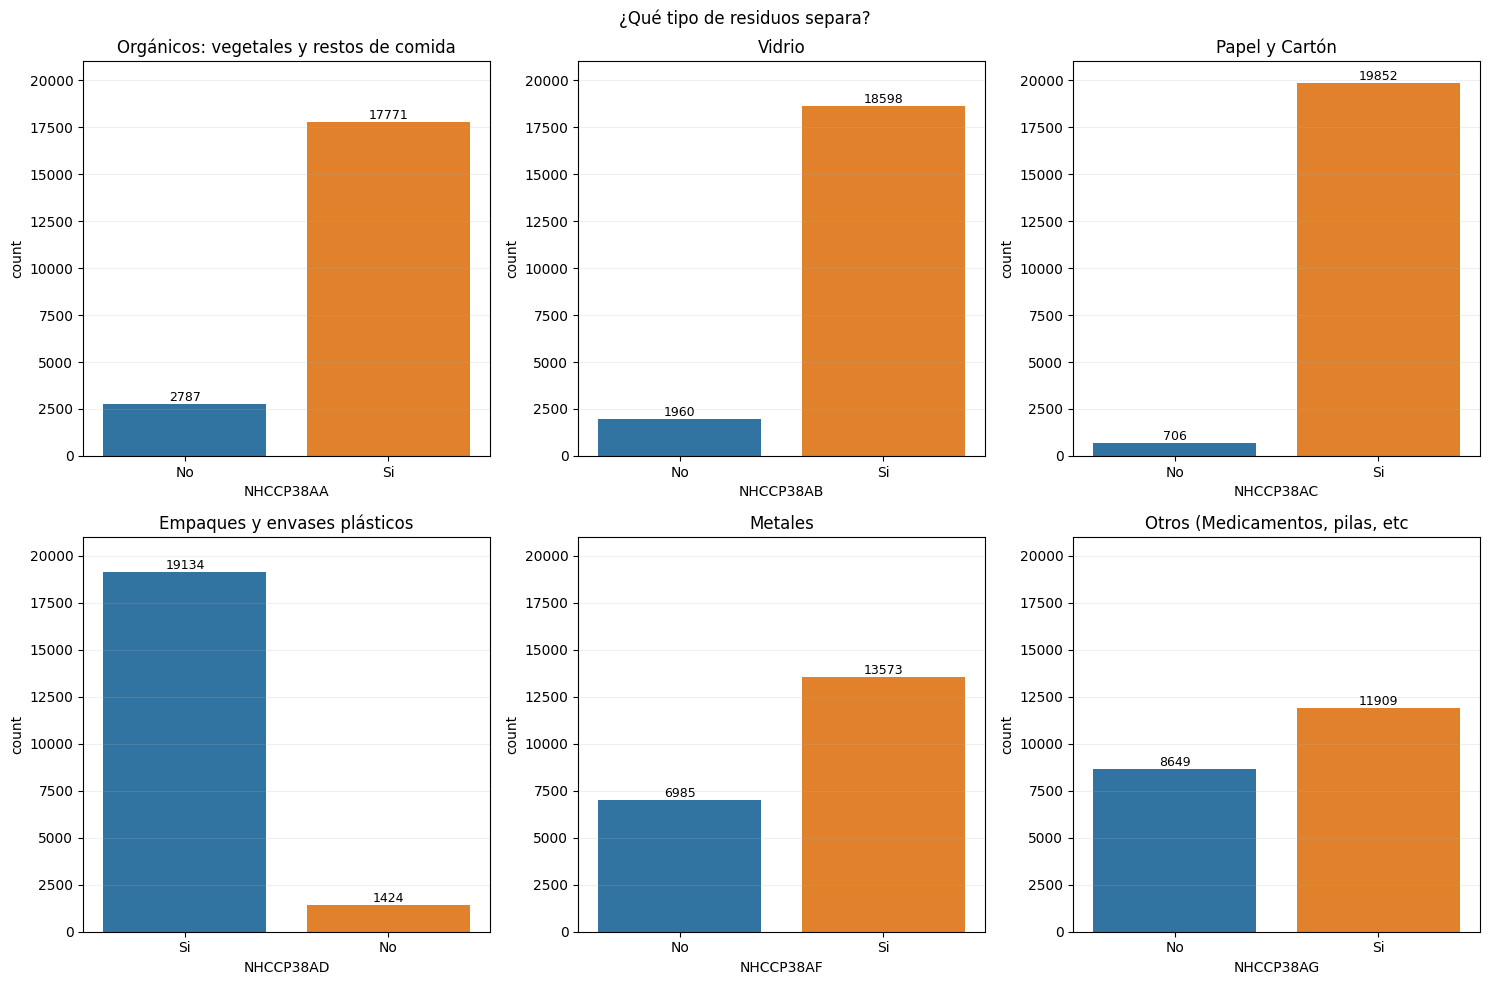

In [62]:
fig, axes = plt.subplots(2,3, figsize = (15,10), squeeze=False)
axli = axes.flatten()
fig.subplots_adjust(top=0.9)
fig.suptitle('¿Qué tipo de residuos separa?')
for ax,cols,names in zip(axli,residuos,l_res):
    sns.countplot(x = cols, data = data, ax = ax)
    ax.grid(alpha = 0.2, axis = 'y')
    ax.set_title(f'{names}')
    #ax.set_xticks([0,1],['No','Si'])
    ax.set_ylim(0,21000)
    ax.margins(y=0.1) # make room for the labels
    for bars in ax.containers:
        ax.bar_label(bars, fmt='%.0f', fontsize=9)
plt.tight_layout()
    
plt.show()

## NHCCP38B
### ¿Cuál es la razón principal por la que no separa los residuos?

1. Falta de espacio
2. No saben cómo hacerlo
3. No vale la pena porque después se junta todo 
4. No reciben beneficio alguno
5. Otra


**Datos: 3978**

In [162]:
data['NHCCP38B'].count()

3978

In [63]:
data['NHCCP38B'] = data['NHCCP38B'].replace([1,2,3,4,5],["Falta de espacio",
                                                        "No saben cómo hacerlo",
                                                        "No vale la pena porque despues se junta todo",
                                                        "No reciben beneficio alguno",
                                                        "Otra"])

In [66]:
data['NHCCP38B'].value_counts()

No vale la pena porque despues se junta todo    1349
No saben cómo hacerlo                           1029
Falta de espacio                                 952
No reciben beneficio alguno                      565
Otra                                              83
Name: NHCCP38B, dtype: int64

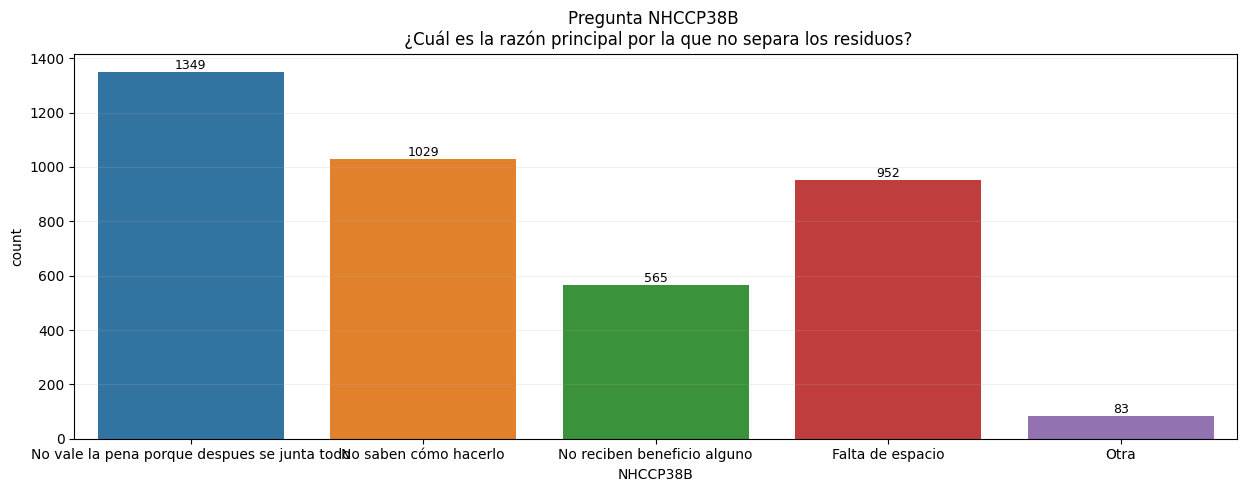

In [68]:
fig, ax = plt.subplots(figsize=(15, 5))
g = sns.countplot(ax=ax, data = data, x ='NHCCP38B')

for bars in ax.containers:
    ax.bar_label(bars, fmt='%.0f', fontsize=9)
            
ax.set_title('Pregunta NHCCP38B \n ¿Cuál es la razón principal por la que no separa los residuos?')
#ax.set_xticklabels(['Falta de espacio',
#                    'No saben cómo hacerlo',
#                    'No vale la pena porque \n después se junta todo',
#                    'No reciben beneficio alguno',
#                    'Otra'])

plt.grid(alpha = 0.2, axis = 'y')
plt.show()

## NHCCP39
### 36. ¿Cuáles de las siguientes prácticas realiza este hogar para reducir el consumo de agua y energía eléctrica?

**Datos: 24536**

In [69]:
b_pra  = [i for i in data.columns if 'NHCCP39' in str(i)]
print(b_pra)
for i in b_pra:
    print(i, data[i].count())

['NHCCP39A', 'NHCCP39B', 'NHCCP393', 'NHCCP39C', 'NHCCP39D', 'NHCCP39E', 'NHCCP39F', 'NHCCP39G', 'NHCCP399']
NHCCP39A 24536
NHCCP39B 24536
NHCCP393 24536
NHCCP39C 24536
NHCCP39D 24536
NHCCP39E 24536
NHCCP39F 24536
NHCCP39G 24536
NHCCP399 24536


In [70]:
for i in b_pra:
    print(data[i].value_counts())

1    23317
0     1219
Name: NHCCP39A, dtype: int64
1    23757
0      779
Name: NHCCP39B, dtype: int64
1    17497
0     7039
Name: NHCCP393, dtype: int64
1    14562
0     9974
Name: NHCCP39C, dtype: int64
1    18081
0     6455
Name: NHCCP39D, dtype: int64
0    14255
1    10281
Name: NHCCP39E, dtype: int64
0    20845
1     3691
Name: NHCCP39F, dtype: int64
1    12365
0    12171
Name: NHCCP39G, dtype: int64
0    16511
1     8025
Name: NHCCP399, dtype: int64


In [71]:
for i in b_pra:
    data = data.replace({i:2},0)

In [72]:
for i in b_pra:
    data[i] = data[i].replace([0,1],["No","Si"]) 

In [73]:
l_pra = ['Usar luminarias o bombillas de bajo consumo (LED)',
         'Apagar luces',
         'Planchar la mayor cantidad de ropa en cada ocasión o no planchar',
         'Cambiar electrodomésticos por otros de bajo consumo',
         'Desconectar aparatos eléctricos cuando no los usan',
         'Reutilizar agua de la ducha,\n lavado de ropa, lavamanos y lavaplatos',
        'Recolectar agua lluvia',
        'Usar tanque sanitario de bajo consumo de agua',
        'Instalaron accesorios ahorradores\n de agua en duchas, lavamanos y lavaplatos']

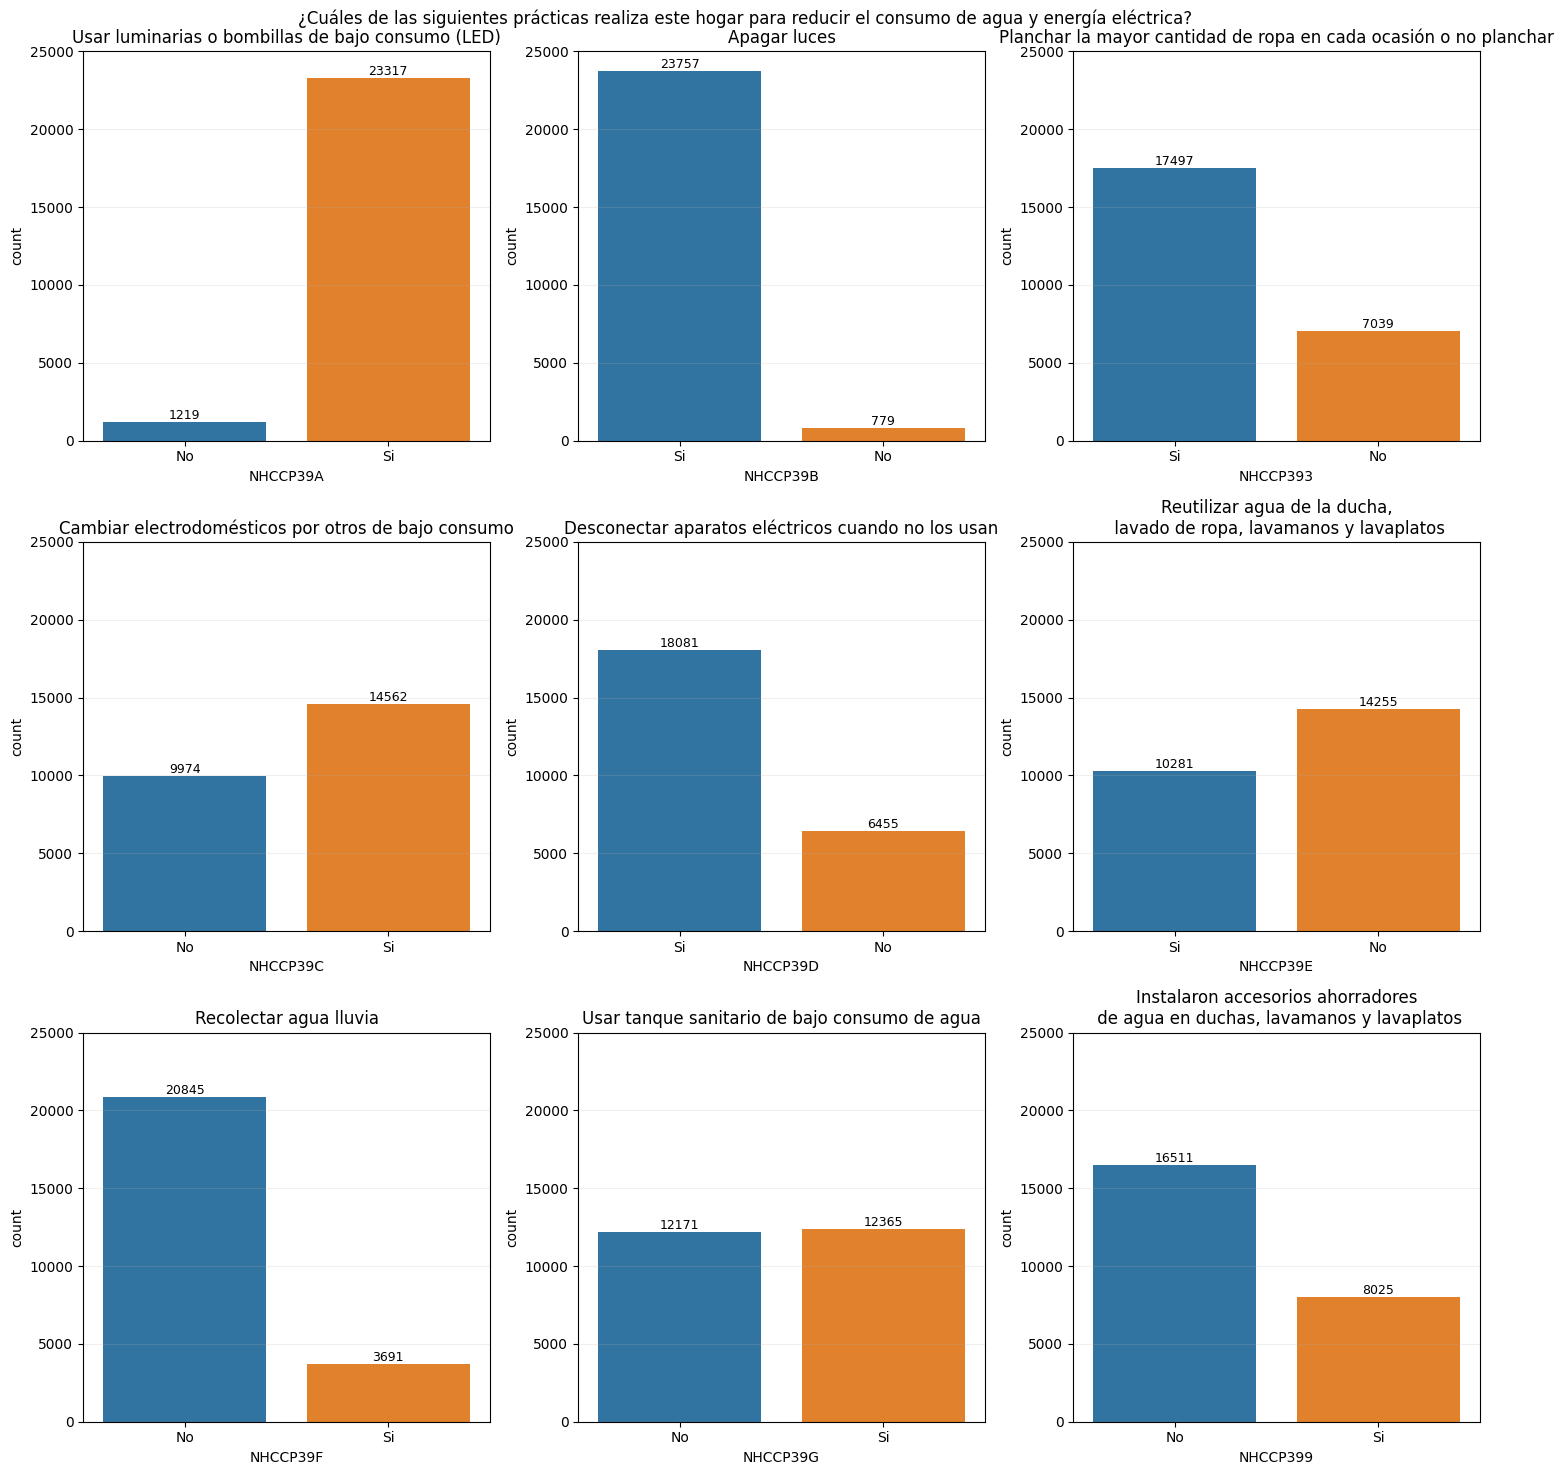

In [74]:
fig, axes = plt.subplots(3,3, figsize = (15,15), squeeze=False)
axli = axes.flatten()
fig.subplots_adjust(top=0.9)
fig.suptitle('¿Cuáles de las siguientes prácticas realiza este hogar para reducir el consumo de agua y energía eléctrica?')
for ax,cols,names in zip(axli,b_pra,l_pra):
    sns.countplot(x = cols, data = data, ax = ax)
    ax.grid(alpha = 0.2, axis = 'y')
    ax.set_title(f'{names}')
    #ax.set_xticklabels(['No','Si'])
    ax.set_ylim(0,25000)
    ax.margins(y=0.1) # make room for the labels
    for bars in ax.containers:
        ax.bar_label(bars, fmt='%.0f', fontsize=9)
plt.tight_layout()
      
plt.show()


## NHCCP41 
### 38. ¿Las personas de este hogar poseen carro particular?

**Datos: 24536**

In [170]:
data['NHCCP41'].count()

24536

In [171]:
data['NHCCP41'].value_counts()

1    13095
2    11441
Name: NHCCP41, dtype: int64

In [172]:
data = data.replace({'NHCCP41':2},0)

In [75]:
data['NHCCP41'] = data['NHCCP41'].replace([0,1],["No","Si"])

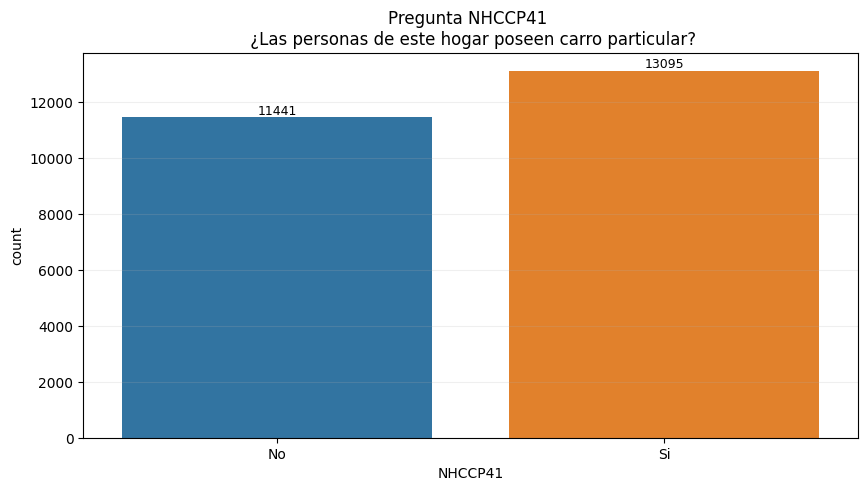

In [76]:
fig, ax = plt.subplots(figsize=(10, 5))
g = sns.countplot(ax=ax, data = data, x ='NHCCP41')

for bars in ax.containers:
    ax.bar_label(bars, fmt='%.0f', fontsize=9)
            
ax.set_title('Pregunta NHCCP41 \n ¿Las personas de este hogar poseen carro particular?')
#ax.set_xticklabels(['No', 'Si'])

plt.grid(alpha = 0.2, axis = 'y')
plt.show()

## NHCCP44
### 40. ¿Las personas de este hogar poseen motocicleta?

0. No
1. Si

**Datos: 24536**

In [174]:
data['NHCCP44'].count()

24536

In [175]:
data['NHCCP44'].value_counts()

2    21859
1     2677
Name: NHCCP44, dtype: int64

In [176]:
data = data.replace({'NHCCP44':2},0)

In [77]:
data['NHCCP44'] = data['NHCCP44'].replace([0,1],["No","Si"])

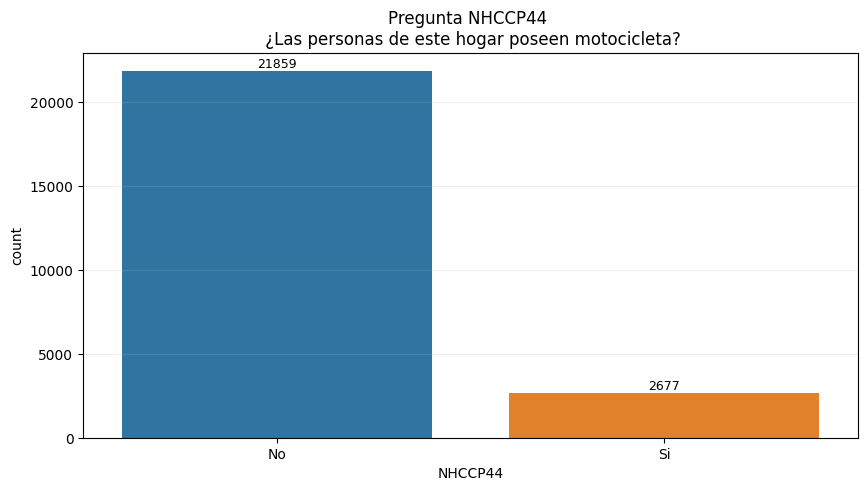

In [78]:
fig, ax = plt.subplots(figsize=(10, 5))
g = sns.countplot(ax=ax, data = data, x ='NHCCP44')

for bars in ax.containers:
    ax.bar_label(bars, fmt='%.0f', fontsize=9)
            
ax.set_title('Pregunta NHCCP44 \n ¿Las personas de este hogar poseen motocicleta?')
#ax.set_xticklabels(['No', 'Si'])

plt.grid(alpha = 0.2, axis = 'y')
plt.show()

## NHCCP45
### 41. ¿Las personas de este hogar poseen bicicleta?

**Datos: 24536**

In [178]:
data['NHCCP45'].count()

24536

In [179]:
data['NHCCP45'].value_counts()

1    12812
2    11724
Name: NHCCP45, dtype: int64

In [180]:
data = data.replace({'NHCCP45':2},0)

In [79]:
data['NHCCP45'] = data['NHCCP45'].replace([0,1],["No","Si"])

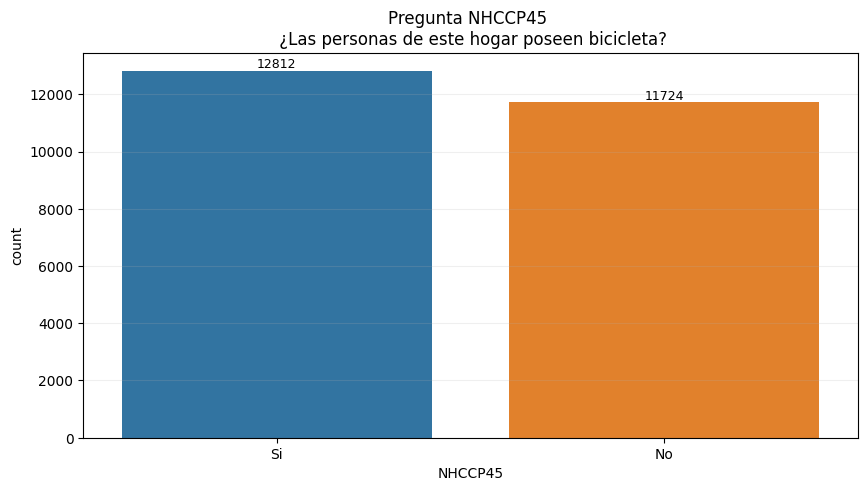

In [80]:
fig, ax = plt.subplots(figsize=(10, 5))
g = sns.countplot(ax=ax, data = data, x ='NHCCP45')

for bars in ax.containers:
    ax.bar_label(bars, fmt='%.0f', fontsize=9)
            
ax.set_title('Pregunta NHCCP45 \n ¿Las personas de este hogar poseen bicicleta?')
#ax.set_xticklabels(['No', 'Si'])

plt.grid(alpha = 0.2, axis = 'y')
plt.show()

## NHCCP45A
### ¿Cuántas bicicletas?

**Datos: 12812**

In [182]:
data['NHCCP45A'].describe().apply("{0:.2f}".format)

count    12812.00
mean         1.90
std          1.01
min          1.00
25%          1.00
50%          2.00
75%          2.00
max          8.00
Name: NHCCP45A, dtype: object

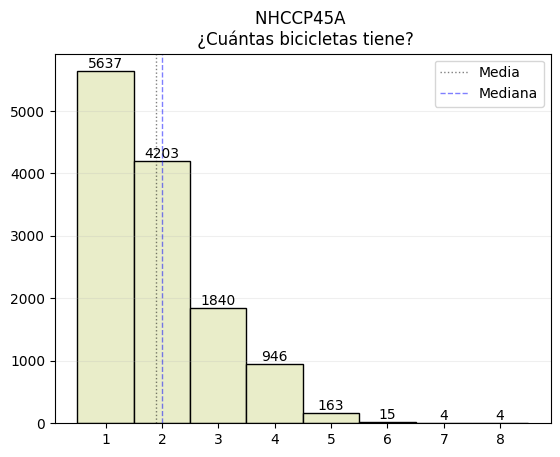

In [186]:
counts, edges, bars = plt.hist(data['NHCCP45A'], bins = np.arange(1,10)-0.5, edgecolor = 'black', color = '#e9edc9')
plt.title('NHCCP45A \n ¿Cuántas bicicletas tiene?')
plt.axvline(data['NHCCP45A'].mean(), color='k', alpha = 0.5, linestyle=':', linewidth=1, label = 'Media')
plt.axvline(data['NHCCP45A'].median(), color='b', alpha = 0.5, linestyle='dashed', linewidth=1, label = 'Mediana')
plt.xticks(range(1,9))
plt.bar_label(bars)
plt.legend()
plt.grid(alpha = 0.2, axis = 'y')
plt.show()

## NHCCP45B
### ¿Cuántas se utilizan como medio de transporte para ir a trabajar, estudiar, hacer diligencias o visitar familiares y amigos?

**Datos: 12812**

In [187]:
data['NHCCP45B'].describe().apply("{0:.2f}".format)

count    12812.00
mean         0.73
std          0.92
min          0.00
25%          0.00
50%          0.00
75%          1.00
max          6.00
Name: NHCCP45B, dtype: object

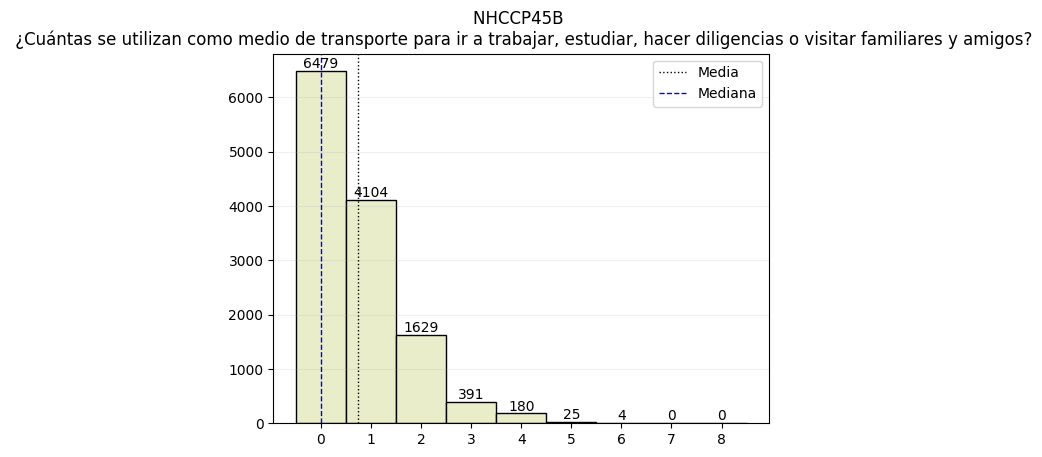

In [188]:
counts, edges, bars = plt.hist(data['NHCCP45B'], bins = np.arange(10)-0.5, edgecolor = 'black', color = '#e9edc9')
plt.xticks(range(9))
plt.bar_label(bars)
plt.title('NHCCP45B \n ¿Cuántas se utilizan como medio de transporte para ir a trabajar, estudiar, hacer diligencias o visitar familiares y amigos?')
#plt.xlim([-1,10])
plt.axvline(data['NHCCP45B'].mean(), color='k', linestyle=':', linewidth=1, label = 'Media')
plt.axvline(data['NHCCP45B'].median(), color='b', linestyle='dashed', linewidth=1, label = 'Mediana')
plt.legend()
plt.grid(alpha = 0.2, axis = 'y')
plt.show()

## NHCCP41_A
### 41a. 1. ¿En el ÚLTIMO AÑO algún miembro de este hogar ha tenido accidentes transportándose en bicicleta?

0. No
1. Si

**Datos: 6333**

In [189]:
data['NHCCP41_A'].count()

6333

In [190]:
data['NHCCP41_A'].value_counts()

2.0    5601
1.0     732
Name: NHCCP41_A, dtype: int64

In [191]:
data = data.replace({'NHCCP41_A':2},0)

In [81]:
data['NHCCP41_A'] = data['NHCCP41_A'].replace([0,1],["No","Si"])

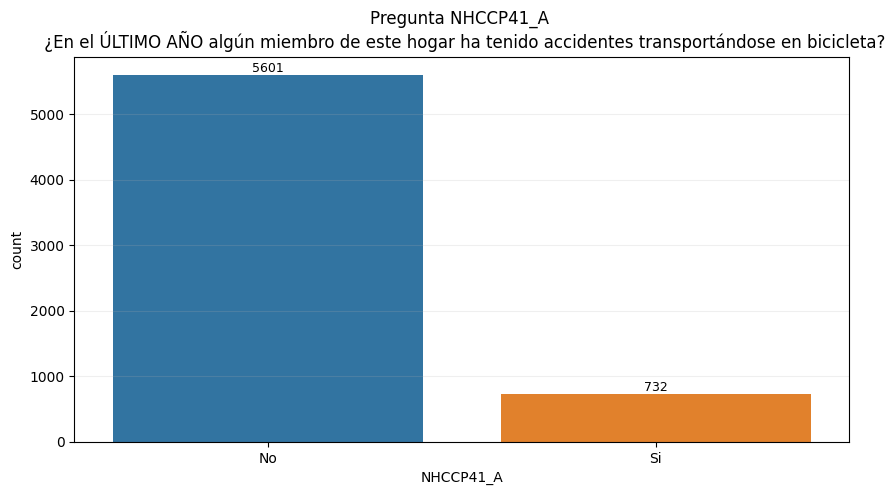

In [82]:
fig, ax = plt.subplots(figsize=(10, 5))
g = sns.countplot(ax=ax, data = data, x ='NHCCP41_A')

for bars in ax.containers:
    ax.bar_label(bars, fmt='%.0f', fontsize=9)
            
ax.set_title('Pregunta NHCCP41_A \n ¿En el ÚLTIMO AÑO algún miembro de este hogar ha tenido accidentes transportándose en bicicleta?')
#ax.set_xticklabels(['No', 'Si'])

plt.grid(alpha = 0.2, axis = 'y')
plt.show()

## NHCCP41_B
### 41a. 2. ¿En el ÚLTIMO AÑO algún miembro de este hogar ha sido víctima de robo de su bicicleta?

**Datos: 6333**

In [193]:
data['NHCCP41_B'].count()

6333

In [194]:
data['NHCCP41_B'].value_counts()

2.0    5510
1.0     823
Name: NHCCP41_B, dtype: int64

In [195]:
data = data.replace({'NHCCP41_B':2},0)

In [83]:
data['NHCCP41_B'] = data['NHCCP41_B'].replace([0,1],["No","Si"])

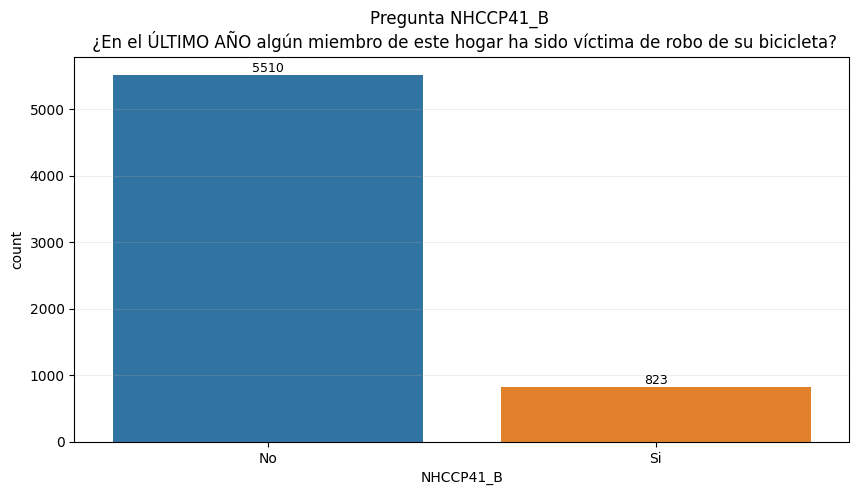

In [84]:
fig, ax = plt.subplots(figsize=(10, 5))
g = sns.countplot(ax=ax, data = data, x ='NHCCP41_B')

for bars in ax.containers:
    ax.bar_label(bars, fmt='%.0f', fontsize=9)
            
ax.set_title('Pregunta NHCCP41_B \n ¿En el ÚLTIMO AÑO algún miembro de este hogar ha sido víctima de robo de su bicicleta?')
#ax.set_xticklabels(['No', 'Si'])

plt.grid(alpha = 0.2, axis = 'y')
plt.show()


## NHCCP46
### 42. ¿Cuánto tiempo gastan caminando, en promedio, las personas de este hogar para llegar a los siguientes servicios o establecimientos más cercanos a la vivienda?:
1. Estación TransMilenio o paradero alimentador (solo para Bogotá y Soacha)
2. Paradero buses del SITP (solo para Bogotá y Soacha)
3. Paradero de transporte público (buses, busetas o colectivos)
4. Paradero de transporte intermunicipal
5. Parque o zonas verdes
6. Tienda o supermercado
7. Droguería o farmacia
8. Banco o cajero
9. CAI o estación de policía
10. Biblioteca
11. Escenarios culturales o recreativos
12. Cicloruta
13. Centro Médico

**Datos: 23173**

*Falta Revisar los casos 1000*

In [86]:
tiempo  = [i for i in data.columns if 'NHCCP46' in str(i)]
print(tiempo)

['NHCCP46A', 'NHCCP46B', 'NHCCP46C', 'NHCCP46D', 'NHCCP46E', 'NHCCP46F', 'NHCCP46G', 'NHCCP46H', 'NHCCP46I', 'NHCCP46J', 'NHCCP46K', 'NHCCP46L', 'NHCCP46M']


In [104]:
for i in tiempo:
    data[i] = data[i].replace(999,stats.trim_mean(data[i],0.1))

In [107]:
for i in tiempo:
    print(data[i].describe())

count    23173.000000
mean        13.410166
std         10.070692
min          1.000000
25%          5.000000
50%         10.000000
75%         16.251350
max        120.000000
Name: NHCCP46A, dtype: float64
count    23173.000000
mean         8.606074
std          6.542392
min          1.000000
25%          5.000000
50%          5.000000
75%         10.000000
max        120.000000
Name: NHCCP46B, dtype: float64
count    23173.000000
mean        11.976028
std         13.276921
min          1.000000
25%          5.000000
50%          7.000000
75%         12.000000
max        115.000000
Name: NHCCP46C, dtype: float64
count    23173.000000
mean        75.857330
std         89.668054
min          1.000000
25%         15.000000
50%         30.000000
75%        120.000000
max        236.063118
Name: NHCCP46D, dtype: float64
count    23173.000000
mean         6.543829
std          7.204041
min          1.000000
25%          3.000000
50%          5.000000
75%          6.311360
max        120.000

In [105]:
l_t = ['Estación TransMilenio o paradero alimentador',
         'Paradero buses del SITP',
         'Paradero de transporte público (buses, busetas o colectivos)',
         'Paradero de transporte intermunicipal',
         'Parque o zonas verdes',
         'Tienda o supermercado',
        'Droguería o farmacia',
        'Banco o cajero',
        'CAI o estación de policía',
        'Biblioteca',
        'Escenarios culturales o recreativos',
        'Cicloruta',
      'Centro Médico']

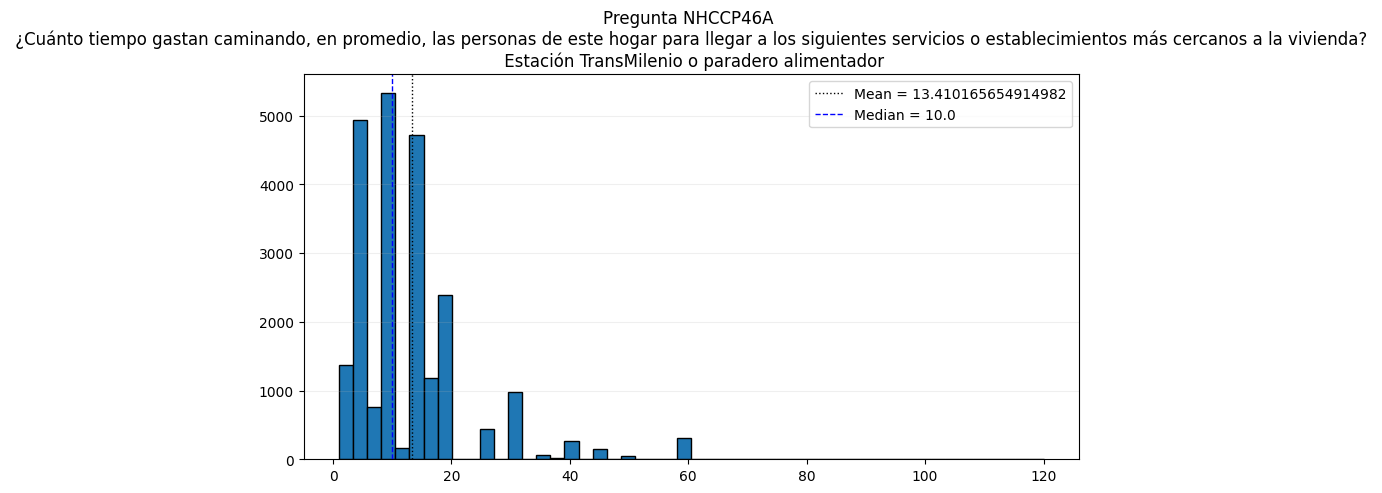

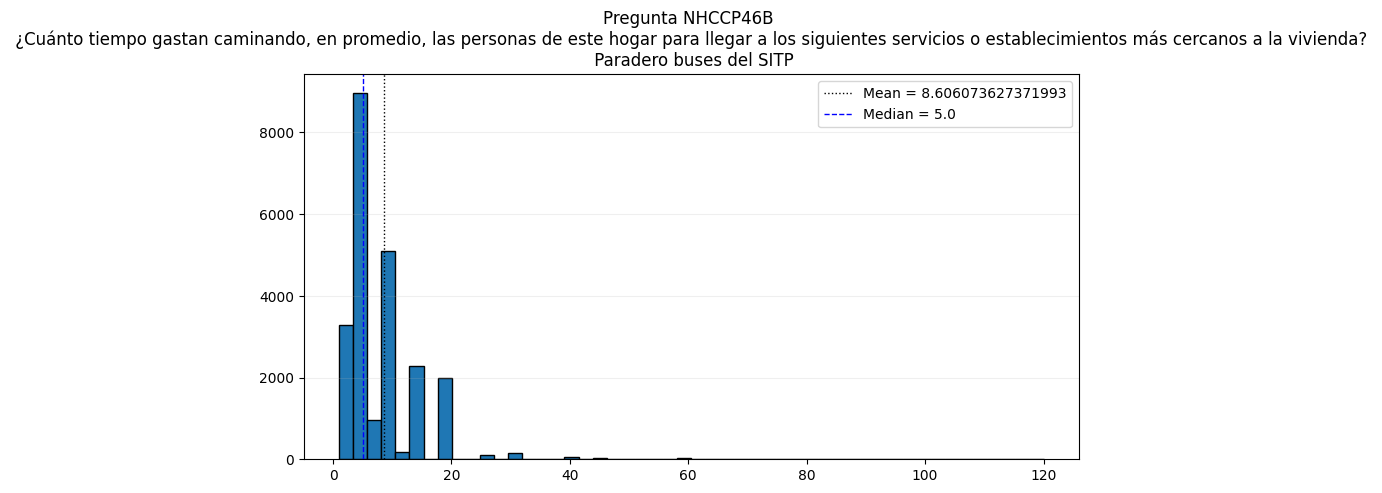

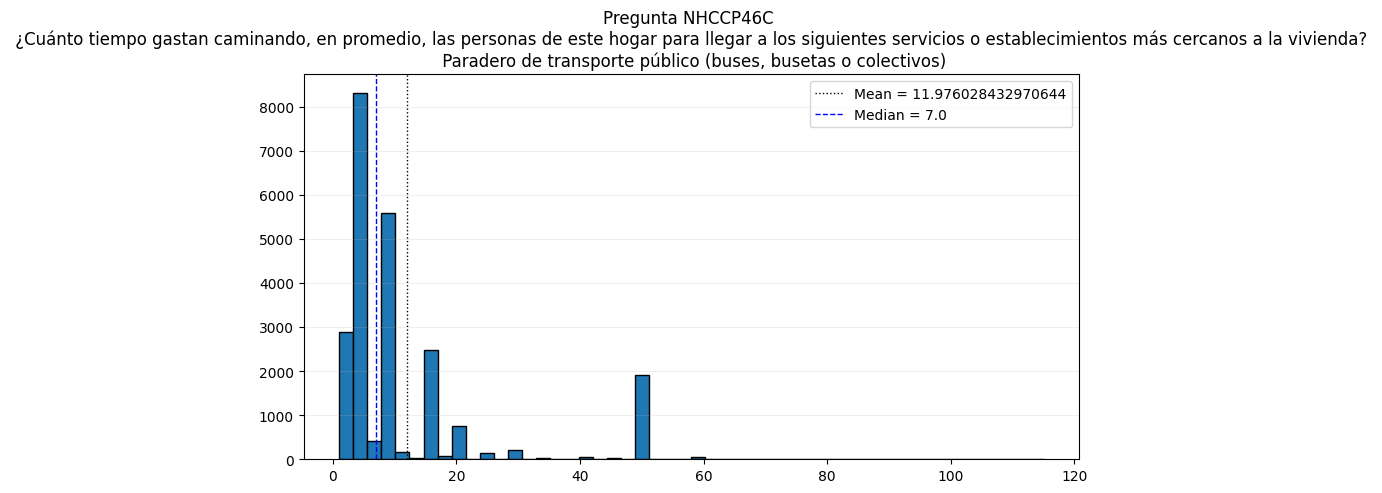

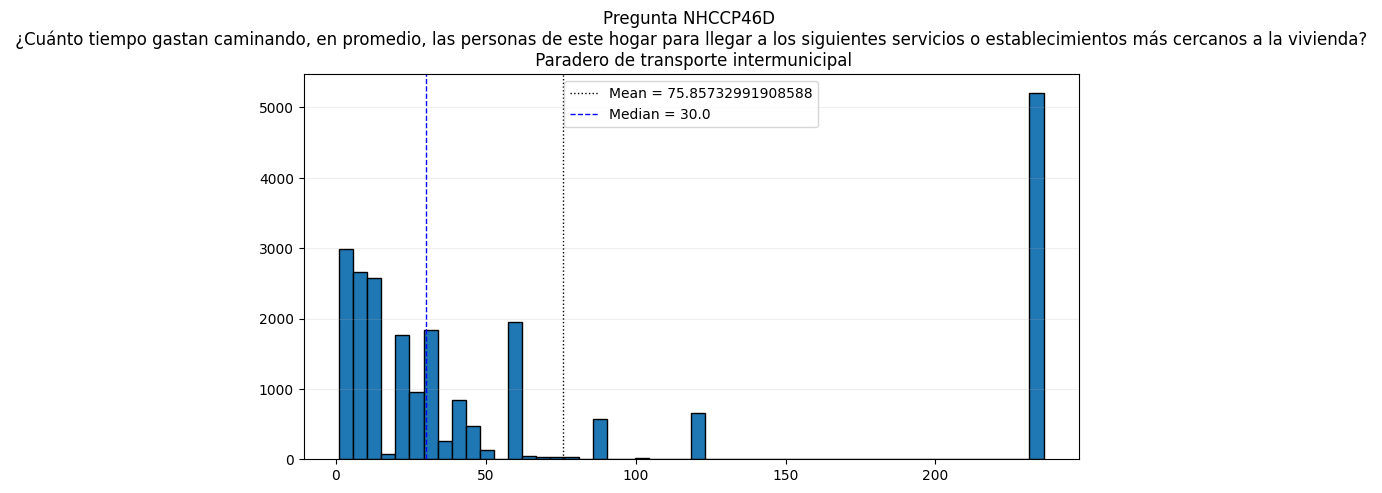

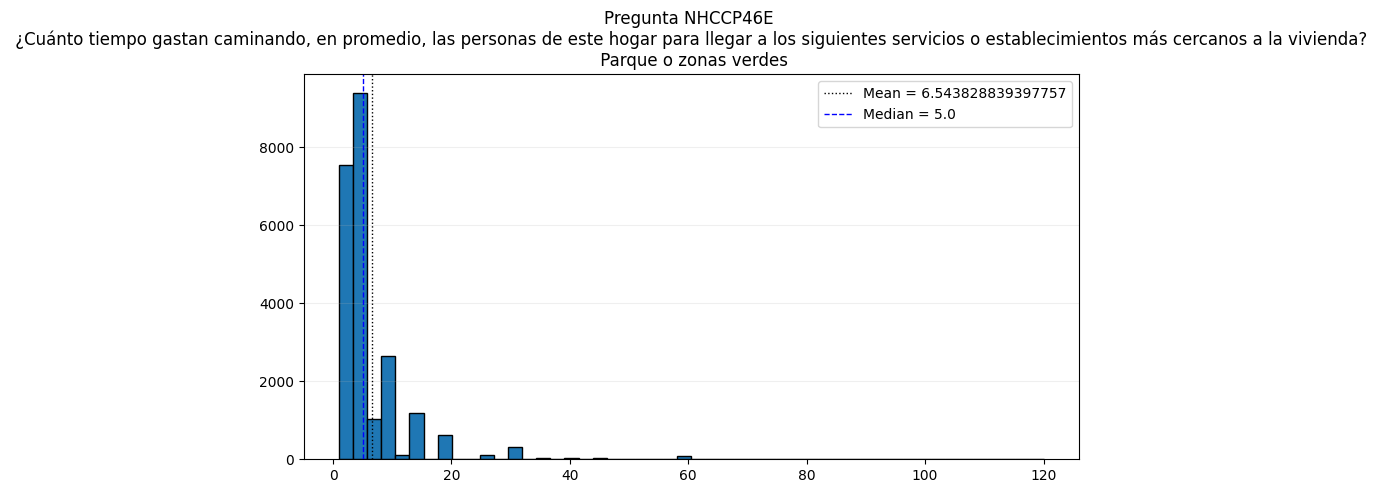

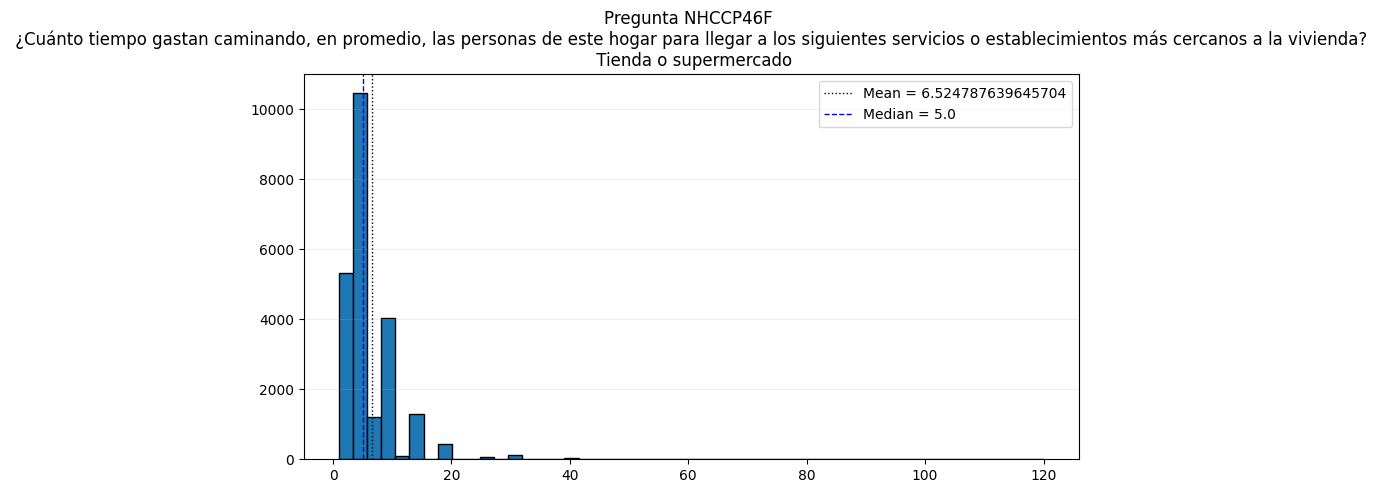

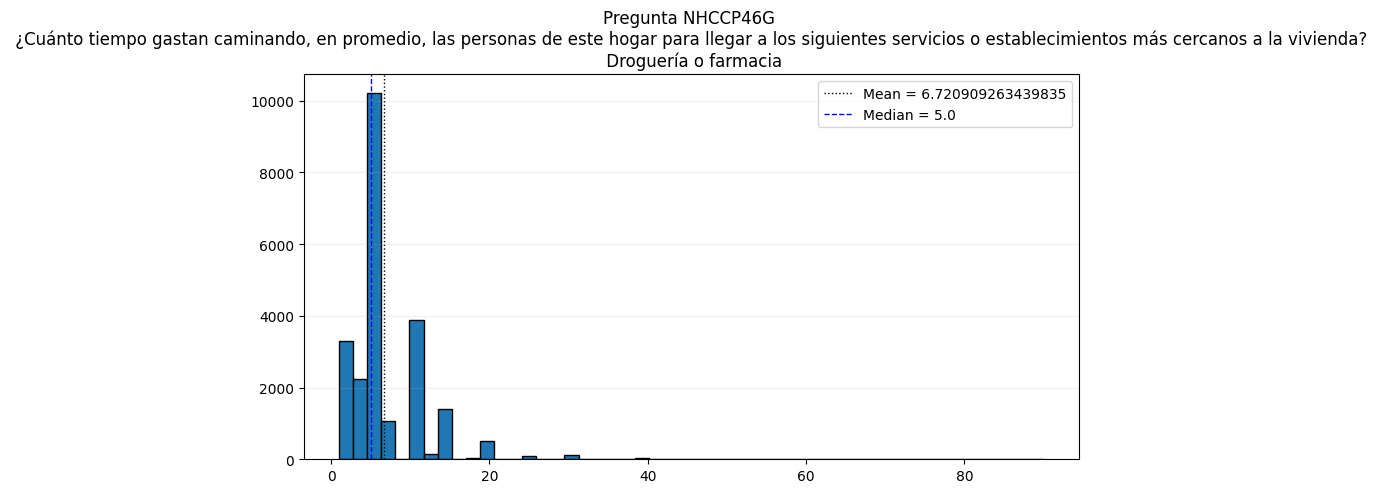

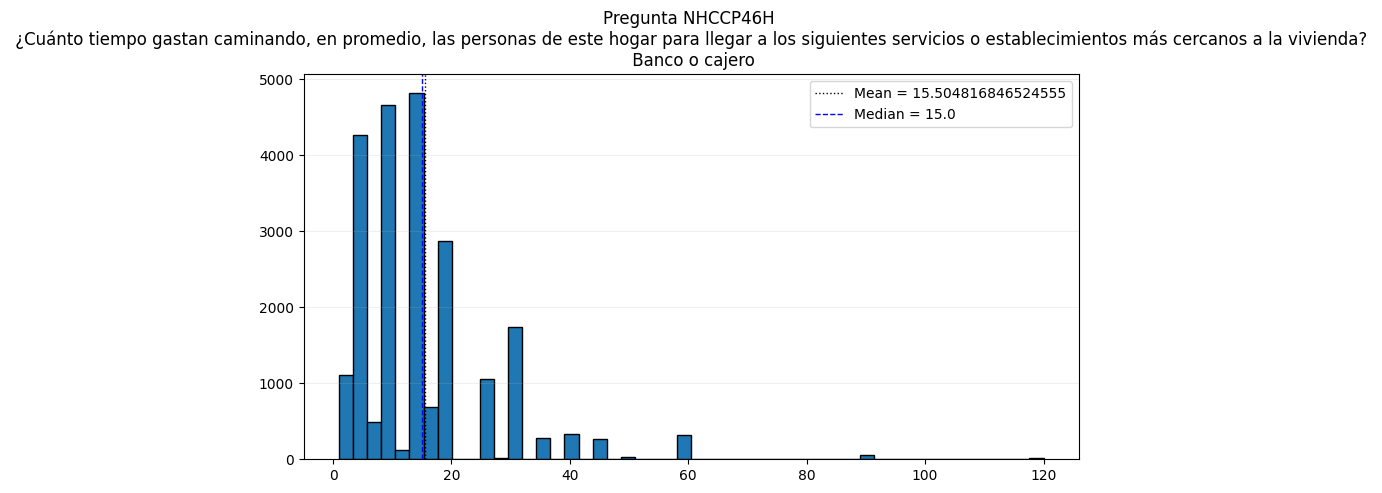

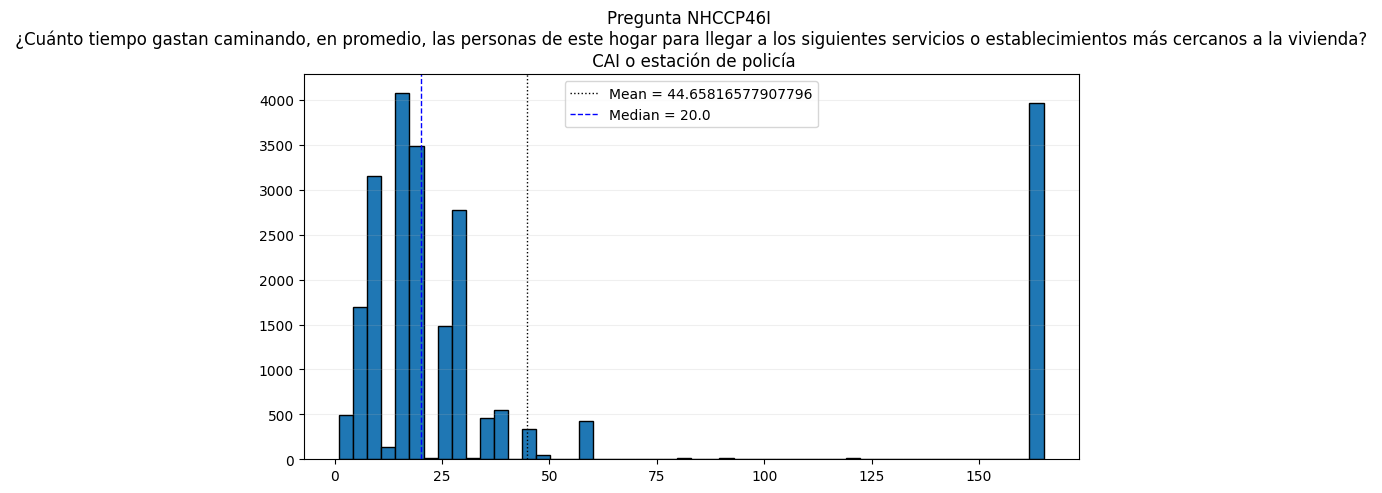

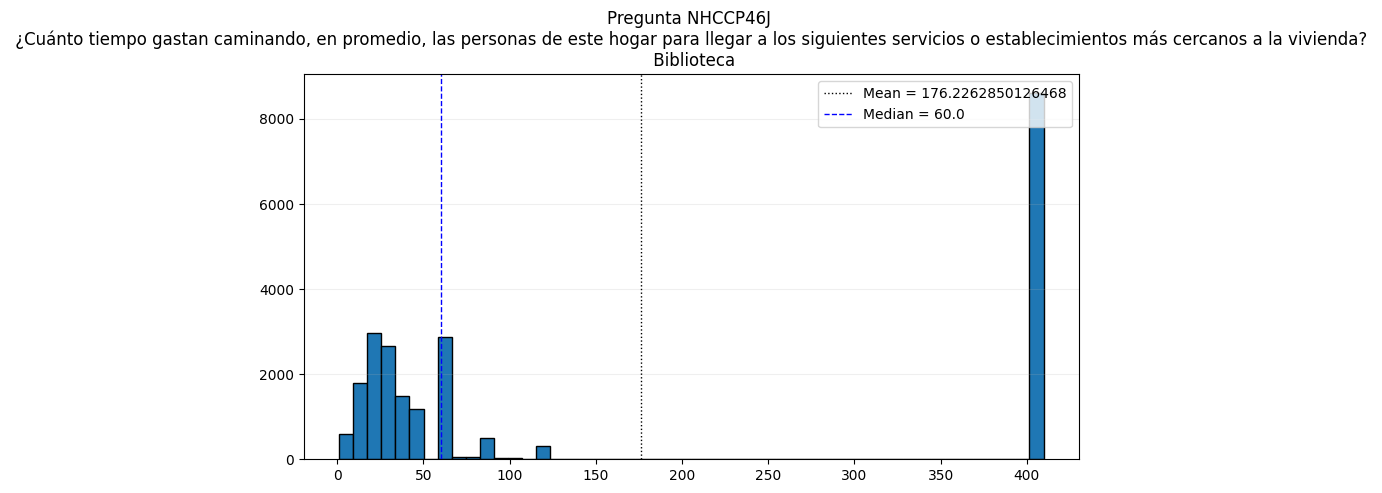

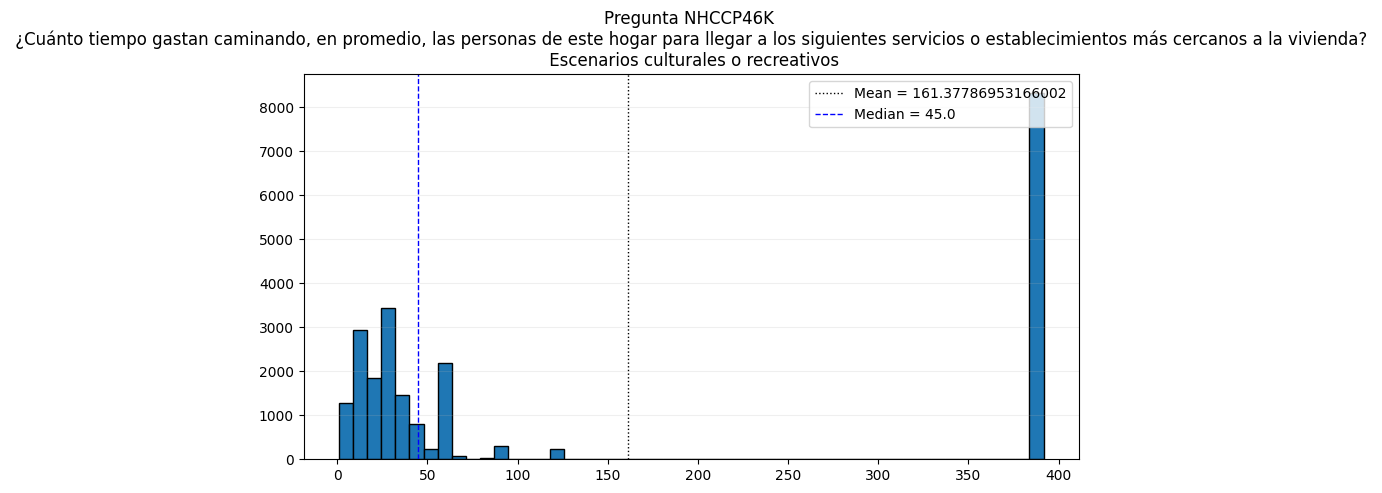

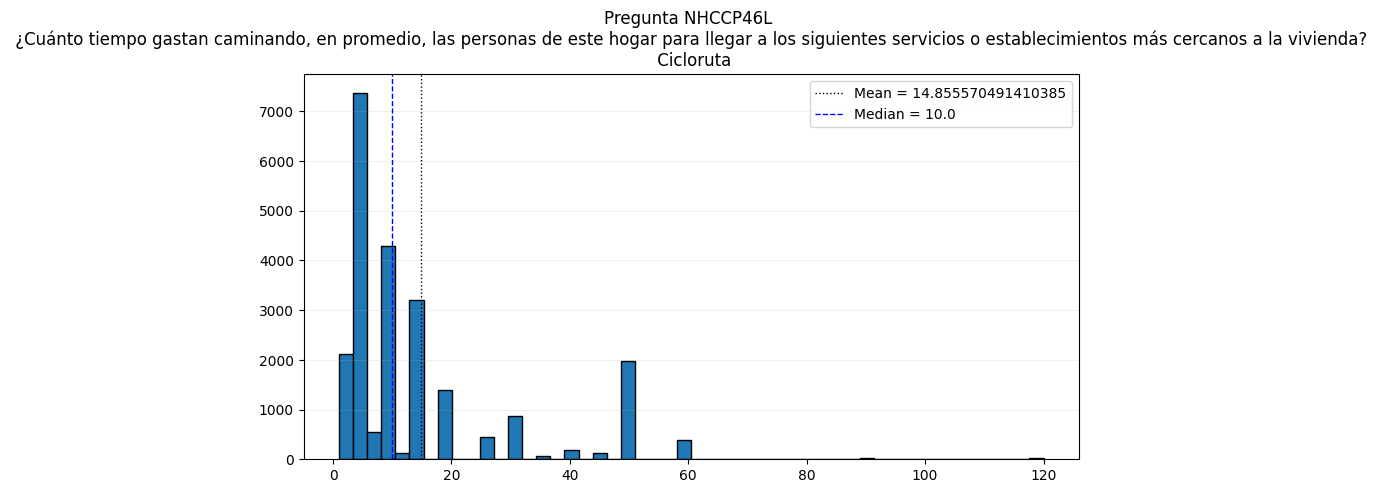

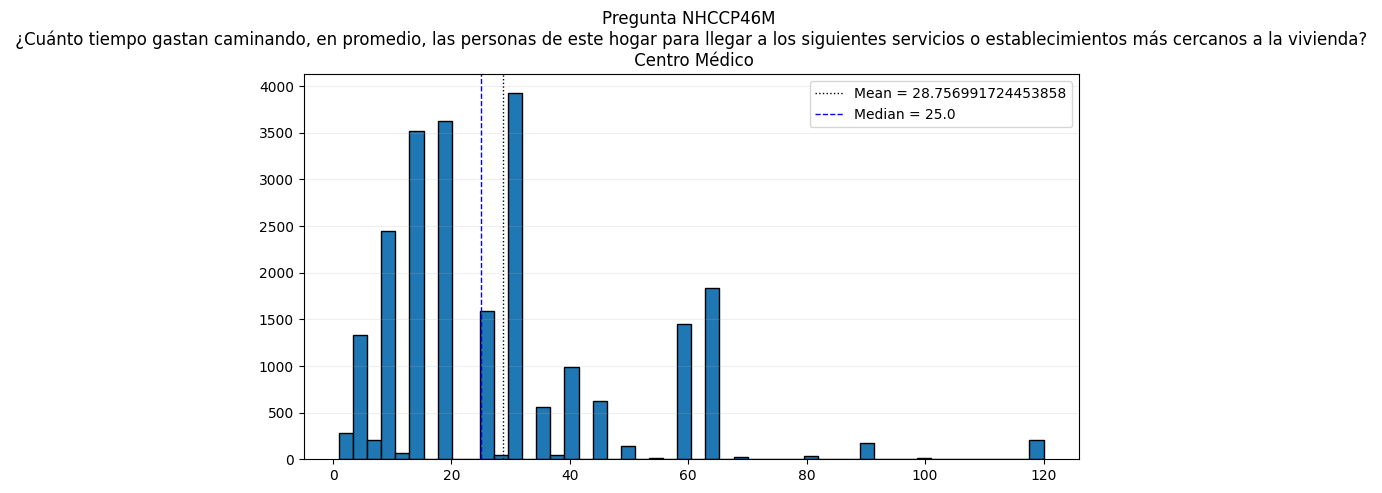

In [112]:
for i,j in zip(tiempo,l_t):
    plt.figure(figsize=(10,5))
    plt.subplot(1,1,1)
    counts, edges, bars = plt.hist(data[i], bins = 50, edgecolor = 'black')
    #plt.xticks(range(0,1001,50))
    plt.axvline(data[i].mean(), color='k', linestyle=':', linewidth=1, label = f'Mean = {data[i].mean()}')
    plt.axvline(data[i].median(), color='b', linestyle='dashed', linewidth=1, label = f'Median = {data[i].median()}')
    #plt.axvline(stats.trim_mean(data[i], 0.125), color='c', linestyle='-.', linewidth=1, label = f'Trim Mean = {stats.trim_mean(data[i], 0.125)}')
    plt.legend()
    plt.grid(alpha = 0.2, axis = 'y')
    plt.title(f'Pregunta {i} \n ¿Cuánto tiempo gastan caminando, en promedio, las personas de este hogar para llegar a los siguientes servicios o establecimientos más cercanos a la vivienda? \n {j}')
    plt.show()
    

In [113]:
data.to_excel('Encuesta_Multiproposito_Suba.xlsx', index = False)